menganalisis Big Data untuk
mengidentifikasi pola dan hubungan kunci antara karakteristik lobster, proses penangkapan dan pengelolaan, serta
kondisi pasar dengan kualitas dan harga jualnya. **bold text**

**TUGAS BESAR BIG DATA (preprocessing )**

Nama kelompok :

1.   Aji Sakti Saputra
2.   Fadhli Jahfal
3.   Rafid Farhan Zai
4.   Yusuf Sohibul



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

**Memanggil dan memeriksa setiap dataset untuk melakukan data cleansing no (1-6)**

# 1.Lobster Dataset

In [ ]:
df_lobster=pd.read_csv('/content/lobster_dataset.csv')# Menginput dataset pertama
df_lobster

,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,fisher_id,vessel_id,fishing_ground_id,market_price_per_kg,is_alive,inspection_passed,export_ready
0,LOB00001,American Lobster,10/5/2023,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,FSH005,VSL002,FG003,37.03,True,True,False
1,LOB00002,European Lobster,8/9/2024,28.48,561.6,16.69,Grade B,Paper Shell,Trawling,FSH036,VSL010,FG007,77.65,False,True,True
2,LOB00003,Rock Lobster,10/8/2023,17.90,1301.7,14.04,Grade A,Paper Shell,Trap,FSH049,VSL006,FG018,41.12,False,True,True
3,LOB00004,American Lobster,10/25/2024,34.84,1205.0,17.85,Grade B,Hard Shell,Hand Picking,FSH036,VSL030,FG021,70.88,True,False,False
4,LOB00005,European Lobster,9/22/2024,35.11,1112.4,14.84,Grade A,Soft Shell,Diving,FSH021,VSL030,FG013,39.85,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,LOB00426,Spiny Lobster,4/30/2024,20.79,230.8,8.92,Grade B,Hard Shell,Trap,FSH012,VSL039,FG005,45.68,True,True,True
10001,LOB00427,Spiny Lobster,11/13/2024,23.84,1058.6,8.76,Reject,Peeler,Hand Picking,FSH089,VSL043,FG025,67.36,False,True,True
10002,LOB00428,Spiny Lobster,5/15/2024,38.31,697.6,11.33,Grade A,Peeler,Trawling,FSH023,VSL029,FG003,52.04,True,False,True
10003,LOB00429,Rock Lobster,2/6/2025,18.25,902.8,12.31,Grade A,Paper Shell,Trawling,FSH014,VSL003,FG003,28.87,False,False,True


In [ ]:
df_lobster.info()#melihat informasi lebih detil pada dataset lobster ini

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lobster_id           10005 non-null  object 
 1   species              10005 non-null  object 
 2   catch_date           10005 non-null  object 
 3   length_cm            10003 non-null  float64
 4   weight_grams         10004 non-null  float64
 5   carapace_length_cm   10005 non-null  float64
 6   grade                10005 non-null  object 
 7   shell_condition      10004 non-null  object 
 8   catch_method         10005 non-null  object 
 9   fisher_id            10005 non-null  object 
 10  vessel_id            10005 non-null  object 
 11  fishing_ground_id    10005 non-null  object 
 12  market_price_per_kg  10005 non-null  float64
 13  is_alive             10005 non-null  bool   
 14  inspection_passed    10005 non-null  bool   
 15  export_ready         10005 non-null 

In [ ]:
df_lobster.isnull().sum()#memeriksa apakah dataset lobster memliki nilai yang null

,0
lobster_id,0
species,0
catch_date,0
length_cm,2
weight_grams,1
carapace_length_cm,0
grade,0
shell_condition,1
catch_method,0
fisher_id,0


**Mengisi kolom yang null dengan kondisi tertentu**

mengisi nilai yang null di kolom length_cm

In [ ]:
df_lobster['length_cm'].value_counts()#memeriksa banyaknya nilai di baris dengan nilai tertentu pada kolom length(dijumlahlkan)

,count
length_cm,
34.70,11
37.89,10
43.17,10
28.16,10
40.35,10
...,...
36.64,1
38.04,1
27.60,1


In [ ]:
df_lobster['length_cm']=df_lobster['length_cm'].fillna(df_lobster['length_cm'].median())#mengisi nilai yang null di kolom length_cm dengan menggunakan median. dengan alasan karena nilai kurang terdistribusi dengan baik/terjadi value yg tidak merata, maka menggunakan median sebagai pengisian nilai null adalah solusinya.
df_lobster['length_cm'].isnull().sum()#memeriksa kembali apakah berhasil/tidak (jika hasil nya 0, maka tandanya data yg null sudah terisi dengan median)

np.int64(0)

Pengisian nilai null di kolom weight_grams

In [ ]:
df_lobster['weight_grams'].value_counts().sort_index(ascending=True)##memeriksa banyaknya nilai di baris dengan nilai tertentu pada kolom weight gram dan diurutkan dari teratas -menurun

,count
weight_grams,
200.1,2
200.2,1
200.3,2
200.6,1
200.7,1
...,...
1499.1,2
1499.4,1
1499.5,2


In [ ]:
df_lobster['weight_grams']=df_lobster['weight_grams'].fillna(df_lobster['weight_grams'].median())#sama seperti kolom length cm. namun hanya berbeda kolom
df_lobster['weight_grams'].isnull().sum()

np.int64(0)

**mengisi nilai null dikolom shell_condition**

In [ ]:
df_lobster['shell_condition'].isnull().sum()

np.int64(1)

In [ ]:
df_lobster['shell_condition'].value_counts()

,count
shell_condition,
Hard Shell,2549
Paper Shell,2540
Soft Shell,2493
Peeler,2422


In [ ]:
df_lobster['shell_condition']=df_lobster['shell_condition'].fillna(method='ffill')#menggunakan metode ffil atau nilai setelehnya pada baris yang null, alasannya karena data bertype string.
df_lobster['shell_condition'].isnull().sum()

<ipython-input-12-1689154881>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_lobster['shell_condition']=df_lobster['shell_condition'].fillna(method='ffill')#menggunakan metode ffil atau nilai setelehnya pada baris yang null, alasannya karena data bertype string.


np.int64(0)

**sudah tidak ada data yang null**

In [ ]:
df_lobster.isnull().sum()#mengecek kembali apakah masih ada data yang null

,0
lobster_id,0
species,0
catch_date,0
length_cm,0
weight_grams,0
carapace_length_cm,0
grade,0
shell_condition,0
catch_method,0
fisher_id,0


MEMERIKSA APAKAH DIDATASET LOBSTER MEMILIKI NILAI YANG DUPLIKAT, IF TRUE MAKA DELETE

In [ ]:
df_lobster.duplicated().sum()

np.int64(5)

In [ ]:
df_lobster=df_lobster.drop_duplicates(subset=['lobster_id'],keep='first')#menghapus baris duplikat dengan syarat menahan/keep data yang awal
df_lobster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lobster_id           10000 non-null  object 
 1   species              10000 non-null  object 
 2   catch_date           10000 non-null  object 
 3   length_cm            10000 non-null  float64
 4   weight_grams         10000 non-null  float64
 5   carapace_length_cm   10000 non-null  float64
 6   grade                10000 non-null  object 
 7   shell_condition      10000 non-null  object 
 8   catch_method         10000 non-null  object 
 9   fisher_id            10000 non-null  object 
 10  vessel_id            10000 non-null  object 
 11  fishing_ground_id    10000 non-null  object 
 12  market_price_per_kg  10000 non-null  float64
 13  is_alive             10000 non-null  bool   
 14  inspection_passed    10000 non-null  bool   
 15  export_ready         10000 non-null  bool 

In [ ]:
df_lobster.duplicated().sum()#karena hasilnya 0, artinya data yang terduplikasi sudah tidak ada, sehingga dataset ini siap di analisis.

np.int64(0)

# 2.Dataset Lobster_fisher

In [ ]:
df_lobster_fishers=pd.read_csv('/content/lobster_fishers_dataset.csv')#menginput dataset yang ke 2 yaitu dataset lobster_fisher
df_lobster

,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,fisher_id,vessel_id,fishing_ground_id,market_price_per_kg,is_alive,inspection_passed,export_ready
0,LOB00001,American Lobster,10/5/2023,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,FSH005,VSL002,FG003,37.03,True,True,False
1,LOB00002,European Lobster,8/9/2024,28.48,561.6,16.69,Grade B,Paper Shell,Trawling,FSH036,VSL010,FG007,77.65,False,True,True
2,LOB00003,Rock Lobster,10/8/2023,17.90,1301.7,14.04,Grade A,Paper Shell,Trap,FSH049,VSL006,FG018,41.12,False,True,True
3,LOB00004,American Lobster,10/25/2024,34.84,1205.0,17.85,Grade B,Hard Shell,Hand Picking,FSH036,VSL030,FG021,70.88,True,False,False
4,LOB00005,European Lobster,9/22/2024,35.11,1112.4,14.84,Grade A,Soft Shell,Diving,FSH021,VSL030,FG013,39.85,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,LOB09996,Spiny Lobster,3/12/2025,32.65,380.5,10.04,Grade C,Soft Shell,Hand Picking,FSH061,VSL041,FG006,55.19,False,False,False
9996,LOB09997,Rock Lobster,9/24/2023,33.84,415.2,9.72,Grade C,Soft Shell,Hand Picking,FSH050,VSL040,FG005,39.87,True,True,True
9997,LOB09998,American Lobster,4/29/2024,15.03,1307.7,9.02,Grade C,Paper Shell,Trap,FSH065,VSL035,FG006,27.20,False,True,True
9998,LOB09999,Slipper Lobster,5/9/2025,17.61,1148.3,10.44,Grade B,Peeler,Trap,FSH067,VSL010,FG017,30.82,True,False,False


**DATA CLEANING**

In [ ]:
df_lobster_fishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   fisher_id              1000 non-null   object
 1   fisher_name            1000 non-null   object
 2   license_number         1000 non-null   object
 3   address                1000 non-null   object
 4   city                   1000 non-null   object
 5   state                  1000 non-null   object
 6   phone                  1000 non-null   object
 7   email                  1000 non-null   object
 8   experience_years       1000 non-null   int64 
 9   license_expiry         1000 non-null   object
 10  vessel_owner           1000 non-null   bool  
 11  crew_size              1000 non-null   int64 
 12  annual_quota_kg        1000 non-null   int64 
 13  total_catch_this_year  1000 non-null   int64 
dtypes: bool(1), int64(4), object(9)
memory usage: 102.7+ KB


In [ ]:
df_lobster_fishers.isnull().sum()

,0
fisher_id,0
fisher_name,0
license_number,0
address,0
city,0
state,0
phone,0
email,0
experience_years,0
license_expiry,0


In [ ]:
df_lobster_fishers.duplicated().sum()

np.int64(0)

In [ ]:
df_lobster_fishers['fisher_name'].value_counts()

,count
fisher_name,
Kenneth Thompson,2
Julie Smith,2
Jessica Johnson,2
Christopher Burns,2
John Smith,2
...,...
Thomas Walker,1
Richard Baker,1
Laura Hernandez,1


**SETELAH DI CEK TERNYATA DATASET YG KEDUA YAITU LOBSTER FISHER SUDAH BERSIH. SEHINGGA SIAP DI ANALISIS**

# 3.Datasets lobster_fishing_ground

In [ ]:
df_lobster_fishing_ground=pd.read_csv('/content/lobster_fishing_grounds_dataset.csv')#Menginput dataset yang ke 3 yaitu dataset lobster_fishing ground
df_lobster_fishing_ground

,fishing_ground_id,ground_name,latitude,longitude,water_depth_meters,water_type,average_temperature_c,lobster_density_per_sqkm,seasonal_closure,protected_area,distance_from_shore_km,bottom_type,current_strength,accessibility_rating
0,FG001,Bobbyland Ridge,41.093432,-74.396275,53,Deep Water,8.6,285,False,False,31.6,Rocky,Weak,8
1,FG002,Lake Amberton Ridge,37.909529,-68.968687,46,Coastal,15.9,358,False,False,63.6,Mixed,Strong,8
2,FG003,Lake Melissa Ridge,43.151354,-70.060466,186,Deep Water,8.5,417,True,False,59.9,Rocky,Moderate,2
3,FG004,Morenoborough Ridge,44.937554,-71.608866,65,Sandy Bottom,16.0,266,False,True,20.1,Sandy,Strong,7
4,FG005,North Brandiberg Area,35.569966,-72.575325,31,Coastal,17.9,333,False,True,94.2,Mixed,Moderate,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,FG255,North Michelle Shelf,38.331931,-66.644350,58,Deep Water,16.8,442,True,False,74.7,Sandy,Strong,1
255,FG256,Montoyaview Banks,42.509918,-69.374205,102,Coastal,10.2,280,False,True,81.2,Muddy,Weak,9
256,FG257,North Sherry Ridge,35.329705,-74.343221,96,Coastal,14.1,453,False,False,55.2,Muddy,Strong,6
257,FG258,Elizabethborough Ground,38.392360,-68.578324,109,Coastal,17.9,464,True,True,82.9,Mixed,Strong,4


**DATA CLEANING**

In [ ]:
df_lobster_fishing_ground.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fishing_ground_id         259 non-null    object 
 1   ground_name               259 non-null    object 
 2   latitude                  259 non-null    float64
 3   longitude                 259 non-null    float64
 4   water_depth_meters        259 non-null    int64  
 5   water_type                259 non-null    object 
 6   average_temperature_c     259 non-null    float64
 7   lobster_density_per_sqkm  259 non-null    int64  
 8   seasonal_closure          259 non-null    bool   
 9   protected_area            259 non-null    bool   
 10  distance_from_shore_km    259 non-null    float64
 11  bottom_type               259 non-null    object 
 12  current_strength          259 non-null    object 
 13  accessibility_rating      259 non-null    int64  
dtypes: bool(2)

In [ ]:
df_lobster_fishing_ground.isnull().sum()

,0
fishing_ground_id,0
ground_name,0
latitude,0
longitude,0
water_depth_meters,0
water_type,0
average_temperature_c,0
lobster_density_per_sqkm,0
seasonal_closure,0
protected_area,0


In [ ]:
df_lobster_fishing_ground.duplicated().sum()

np.int64(0)

**SETELAH DI CEK TERNYATA DATASET YG KETIGA YAITU LOBSTER FISHING GROUND SUDAH BERSIH. SEHINGGA SIAP DI ANALISIS**

# 4.Datasets lobster market sales

In [ ]:
df_lobster_marketsales=pd.read_csv('/content/lobster_market_sales_dataset.csv')#menginput dataset yang ke 4 yaitu lobster market sales
df_lobster_marketsales


,sale_id,lobster_id,sale_date,buyer_name,sale_channel,quantity_sold_kg,price_per_kg,transport_cost,commission_percent,payment_terms,delivery_location,customer_rating,total_sale_value,net_profit
0,SALE00001,LOB08396,2025-04-16,Seafood Market A,Auction,1.22,40.31,20.78,12.9,Net 30,Port Shawn,5,49.1782,22.054212
1,SALE00002,LOB07364,2025-02-27,Restaurant Chain B,Direct Sale,1.20,51.76,25.33,14.3,COD,Daleland,2,62.1120,27.899984
2,SALE00003,LOB03073,2024-10-22,Seafood Market A,Online Platform,0.21,65.89,16.38,5.2,Cash,Port Christinabury,1,13.8369,-3.262619
3,SALE00004,LOB02930,2024-11-15,Processing Plant E,Contract,0.55,38.21,46.45,11.7,Net 30,Williamshire,2,21.0155,-27.893314
4,SALE00005,LOB02422,2024-11-07,Restaurant Chain B,Online Platform,1.41,51.00,42.59,10.1,COD,North Christine,1,71.9100,22.057090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,SALE07996,LOB08133,2025-01-04,Restaurant Chain B,Direct Sale,1.45,41.63,29.90,12.6,Net 15,Lake Anna,5,60.3635,22.857699
7996,SALE07997,LOB04917,2025-04-09,Processing Plant E,Online Platform,0.69,52.34,48.33,12.2,Cash,South Devin,4,36.1146,-16.621381
7997,SALE07998,LOB08667,2024-10-25,Processing Plant E,Contract,0.84,30.99,20.41,13.6,Cash,New Joelchester,1,26.0316,2.081302
7998,SALE07999,LOB02567,2024-07-04,Local Distributor D,Online Platform,0.97,48.64,44.34,6.3,Net 15,Port Roberthaven,5,47.1808,-0.131590


**DATA CLEANING**

In [ ]:
df_lobster_marketsales[df_lobster_marketsales['lobster_id'].str.contains('LOB00001')]


,sale_id,lobster_id,sale_date,buyer_name,sale_channel,quantity_sold_kg,price_per_kg,transport_cost,commission_percent,payment_terms,delivery_location,customer_rating,total_sale_value,net_profit
2965,SALE02966,LOB00001,2024-10-29,Seafood Market A,Contract,1.08,30.39,9.23,6.6,Net 15,New Jennifertown,5,32.8212,21.425001


In [ ]:
df_lobster_marketsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sale_id             8000 non-null   object 
 1   lobster_id          8000 non-null   object 
 2   sale_date           8000 non-null   object 
 3   buyer_name          8000 non-null   object 
 4   sale_channel        8000 non-null   object 
 5   quantity_sold_kg    8000 non-null   float64
 6   price_per_kg        8000 non-null   float64
 7   transport_cost      8000 non-null   float64
 8   commission_percent  8000 non-null   float64
 9   payment_terms       8000 non-null   object 
 10  delivery_location   8000 non-null   object 
 11  customer_rating     8000 non-null   int64  
 12  total_sale_value    8000 non-null   float64
 13  net_profit          8000 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 875.1+ KB


In [ ]:
df_lobster_marketsales.isnull().sum()

,0
sale_id,0
lobster_id,0
sale_date,0
buyer_name,0
sale_channel,0
quantity_sold_kg,0
price_per_kg,0
transport_cost,0
commission_percent,0
payment_terms,0


In [ ]:
df_lobster_marketsales.duplicated().sum()

np.int64(0)

**SETELAH DI CEK TERNYATA DATASET YG KEEMPAT YAITU LOBSTER MARKET SALES SUDAH BERSIH. SEHINGGA SIAP DI ANALISIS.**

# 5.Datasets lobster quality inspections

In [ ]:
df_lobster_quality=pd.read_csv('/content/lobster_quality_inspections_dataset.csv')#Menginput dataset yang ke 5 yaitu dataset lobster quality inspections
df_lobster_quality

,inspection_id,lobster_id,inspection_date,inspector_name,visual_inspection,size_compliance,shell_integrity,meat_quality,parasite_check,contamination_test,overall_result,inspection_cost,certificate_issued,notes
0,INS00001,LOB09664,2025-01-20,Sarah Wilson,Retest Required,False,Poor,Below Standard,Significant,Positive,Conditional Pass,19.10,False,Somebody compare much campaign one according.
1,INS00002,LOB00866,2025-01-05,Sarah Wilson,Retest Required,False,Fair,Premium,Minor,Positive,Fail,23.98,True,Develop happen plan. Charge usually traditiona...
2,INS00003,LOB05862,2025-05-27,Michael Brown,Fail,True,Fair,Standard,Minor,Positive,Retest Required,23.40,False,Mother necessary raise career. Forward event e...
3,INS00004,LOB00044,2025-03-09,Sarah Wilson,Conditional Pass,False,Poor,Standard,Clear,Negative,Conditional Pass,15.31,False,Participant especially special sing while it. ...
4,INS00005,LOB01462,2025-02-12,John Smith,Retest Required,False,Poor,Standard,Clear,Negative,Fail,20.98,True,Way relate stay ability. Whole bad realize ins...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,INS00796,LOB09977,2025-01-31,John Smith,Retest Required,True,Poor,Premium,Clear,Negative,Retest Required,6.37,False,Us across five direction back. Stock group tri...
796,INS00797,LOB04060,2025-01-20,David Johnson,Pass,True,Poor,Premium,Significant,Positive,Retest Required,23.69,True,Office boy rather she party technology grow. M...
797,INS00798,LOB00323,2025-05-06,Michael Brown,Fail,False,Excellent,Standard,Significant,Positive,Fail,7.73,False,Keep war note maintain son the time upon.\nFig...
798,INS00799,LOB09107,2025-05-19,Sarah Wilson,Conditional Pass,False,Fair,Standard,Minor,Positive,Pass,17.98,True,Military pull hit. Respond whose program machi...


**DATA CLEANING**

In [ ]:
df_lobster_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inspection_id       800 non-null    object 
 1   lobster_id          800 non-null    object 
 2   inspection_date     800 non-null    object 
 3   inspector_name      800 non-null    object 
 4   visual_inspection   800 non-null    object 
 5   size_compliance     800 non-null    bool   
 6   shell_integrity     800 non-null    object 
 7   meat_quality        800 non-null    object 
 8   parasite_check      800 non-null    object 
 9   contamination_test  800 non-null    object 
 10  overall_result      800 non-null    object 
 11  inspection_cost     800 non-null    float64
 12  certificate_issued  800 non-null    bool   
 13  notes               800 non-null    object 
dtypes: bool(2), float64(1), object(11)
memory usage: 76.7+ KB


In [ ]:
df_lobster_quality.isnull().sum()

,0
inspection_id,0
lobster_id,0
inspection_date,0
inspector_name,0
visual_inspection,0
size_compliance,0
shell_integrity,0
meat_quality,0
parasite_check,0
contamination_test,0


In [ ]:
df_lobster_quality.duplicated().sum()

np.int64(0)

**SETELAH DI CEK TERNYATA DATASET YG KELIMA YAITU LOBSTER QUALITY SUDAH BERSIH. SEHINGGA SIAP DI ANALISIS.**

# 6.Datasets lobster vessels

In [ ]:
df_lobster_vessels=pd.read_csv('/content/lobster_vessels_dataset.csv')#menginput dataset yang ke6 yaitu lobster vessels
df_lobster_vessels

,vessel_id,vessel_name,vessel_type,length_feet,beam_feet,hull_material,engine_horsepower,fuel_capacity_gallons,crew_capacity,built_year,home_port,registration_number,insurance_value,gps_equipped,sonar_equipped
0,VSL001,"Campbell, Young and Chang Explorer",Offshore Vessel,56,25,Fiberglass,1259,1687,12,2013,Lake Victoria,REG5146,1445654,False,True
1,VSL002,Hamilton-Osborne Hunter,Offshore Vessel,112,19,Aluminum,1450,833,7,2018,West Johnmouth,REG2268,238090,True,False
2,VSL003,"Ramirez, Owens and Short Hunter",Lobster Boat,119,9,Wood,1183,277,9,2002,Simonview,REG4131,994619,False,False
3,VSL004,English Ltd Seeker,Lobster Boat,77,10,Fiberglass,743,1561,5,2013,New Rebekahmouth,REG5759,911615,True,False
4,VSL005,"Whitaker, Montoya and Schwartz Hunter",Lobster Boat,88,22,Fiberglass,556,1266,10,2000,Port Gracemouth,REG3407,406909,False,False
5,VSL006,Pacheco Ltd Catcher,Day Boat,61,14,Aluminum,826,755,9,2010,Jamesburgh,REG7759,1098526,False,False
6,VSL007,Love-Bates Explorer,Day Boat,54,9,Aluminum,1428,1100,5,2012,East Michelleport,REG2982,1997014,False,False
7,VSL008,"Anderson, Carter and Webb Seeker",Offshore Vessel,35,10,Fiberglass,878,1817,6,2017,East Jessica,REG5388,1032273,True,True
8,VSL009,Ibarra Group Explorer,Day Boat,71,13,Wood,976,1300,6,1997,North Haleymouth,REG6518,345534,True,True
9,VSL010,Horton and Sons Explorer,Day Boat,63,15,Fiberglass,1054,407,4,1994,Triciamouth,REG6850,1805959,False,False


**DATA CLEANING**

In [ ]:
df_lobster_vessels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vessel_id              50 non-null     object
 1   vessel_name            50 non-null     object
 2   vessel_type            50 non-null     object
 3   length_feet            50 non-null     int64 
 4   beam_feet              50 non-null     int64 
 5   hull_material          50 non-null     object
 6   engine_horsepower      50 non-null     int64 
 7   fuel_capacity_gallons  50 non-null     int64 
 8   crew_capacity          50 non-null     int64 
 9   built_year             50 non-null     int64 
 10  home_port              50 non-null     object
 11  registration_number    50 non-null     object
 12  insurance_value        50 non-null     int64 
 13  gps_equipped           50 non-null     bool  
 14  sonar_equipped         50 non-null     bool  
dtypes: bool(2), int64(7), obj

In [ ]:
df_lobster_vessels.isnull().sum()

,0
vessel_id,0
vessel_name,0
vessel_type,0
length_feet,0
beam_feet,0
hull_material,0
engine_horsepower,0
fuel_capacity_gallons,0
crew_capacity,0
built_year,0


In [ ]:
df_lobster_vessels.duplicated().sum()

np.int64(0)

SETELAH DI CEK TERNYATA DATASET YG KEENAM YAITU LOBSTER VESSEL SUDAH BERSIH. SEHINGGA SIAP DI ANALISIS

JOIN OPERATION, KAMI MENGGABUNGKAN DATASET DARI YANG KE 1 SAMPAI DENGAN DATASET KE 6, DENGAN CARA INNER JOIN 1 PER 1,AGAR JAUH LEBIH MUDAH DALAM MENGANALISISNYA. DIMULAI DENGAN DATASET 1 DAN 2

# **NAMA VARIABEL :**

1. INNER JOIN DATASET 1 DAN 2 : joined_df
2. INNER JOIN DATASET 1 DAN 3 : joined_df2
3. INNER JOIN DATASET 1 DAN 4 : joined_df3
4. INNER JOIN DATASET 1 DAN 5 : joined_df4
5. INNER JOIN DATASET 1 DAN 6 : joinerd_df5

#  ANALISIS PERTAMA (INNER JOIN DATASET 1 DAN 2)

In [ ]:
joined_df=pd.merge(df_lobster,df_lobster_fishers,on='fisher_id',how='inner')
joined_df

,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,fisher_id,...,city,state,phone,email,experience_years,license_expiry,vessel_owner,crew_size,annual_quota_kg,total_catch_this_year
0,LOB00001,American Lobster,10/5/2023,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,FSH005,...,West David,Illinois,454-659-2473x8532,lfranco@example.net,16,2026-02-18,True,7,4098,3631
1,LOB00002,European Lobster,8/9/2024,28.48,561.6,16.69,Grade B,Paper Shell,Trawling,FSH036,...,North Deborahborough,Virginia,223.290.7348x93467,hfitzgerald@example.org,3,2026-11-04,False,6,2767,1336
2,LOB00003,Rock Lobster,10/8/2023,17.90,1301.7,14.04,Grade A,Paper Shell,Trap,FSH049,...,Stewartmouth,Nevada,930.423.8260,xgordon@example.com,14,2025-09-21,True,1,1494,1095
3,LOB00004,American Lobster,10/25/2024,34.84,1205.0,17.85,Grade B,Hard Shell,Hand Picking,FSH036,...,North Deborahborough,Virginia,223.290.7348x93467,hfitzgerald@example.org,3,2026-11-04,False,6,2767,1336
4,LOB00005,European Lobster,9/22/2024,35.11,1112.4,14.84,Grade A,Soft Shell,Diving,FSH021,...,North Jennifer,Texas,001-344-417-0544,kylealvarez@example.org,10,2025-12-19,True,7,1087,1754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,LOB09996,Spiny Lobster,3/12/2025,32.65,380.5,10.04,Grade C,Soft Shell,Hand Picking,FSH061,...,South Johnmouth,Nevada,+1-912-297-3129x356,brownsarah@example.org,2,2025-12-22,False,6,566,3298
9996,LOB09997,Rock Lobster,9/24/2023,33.84,415.2,9.72,Grade C,Soft Shell,Hand Picking,FSH050,...,Romeroton,New York,(624)615-7094x3006,hardingwilliam@example.org,18,2026-11-13,True,8,4446,2889
9997,LOB09998,American Lobster,4/29/2024,15.03,1307.7,9.02,Grade C,Paper Shell,Trap,FSH065,...,Sarahchester,New Jersey,306-370-5415,karen51@example.net,37,2027-05-20,True,4,759,3144
9998,LOB09999,Slipper Lobster,5/9/2025,17.61,1148.3,10.44,Grade B,Peeler,Trap,FSH067,...,Pachecomouth,Maine,001-342-992-8574x003,debbieedwards@example.org,35,2026-08-27,False,1,3245,2197


In [ ]:
joined_df.info()#mengecek apakah berhasil/tidak penggabungannya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lobster_id             10000 non-null  object 
 1   species                10000 non-null  object 
 2   catch_date             10000 non-null  object 
 3   length_cm              10000 non-null  float64
 4   weight_grams           10000 non-null  float64
 5   carapace_length_cm     10000 non-null  float64
 6   grade                  10000 non-null  object 
 7   shell_condition        10000 non-null  object 
 8   catch_method           10000 non-null  object 
 9   fisher_id              10000 non-null  object 
 10  vessel_id              10000 non-null  object 
 11  fishing_ground_id      10000 non-null  object 
 12  market_price_per_kg    10000 non-null  float64
 13  is_alive               10000 non-null  bool   
 14  inspection_passed      10000 non-null  bool   
 15  exp

Membuat kolom baru dengan  cara mengganti format "catch_date" menjadi "catch_year".

In [ ]:

#tujuannya agar lebih mudah dalam mengfilter kolom/baris tertentu
# hitung jumlah tangkapan lobster berdasarkan spesies dan tahun
joined_df['catch_date']=pd.to_datetime(joined_df['catch_date'])
joined_df['catch_year']=joined_df['catch_date'].dt.year


In [ ]:
joined_df

,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,fisher_id,...,state,phone,email,experience_years,license_expiry,vessel_owner,crew_size,annual_quota_kg,total_catch_this_year,catch_year
0,LOB00001,American Lobster,2023-10-05,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,FSH005,...,Illinois,454-659-2473x8532,lfranco@example.net,16,2026-02-18,True,7,4098,3631,2023
1,LOB00002,European Lobster,2024-08-09,28.48,561.6,16.69,Grade B,Paper Shell,Trawling,FSH036,...,Virginia,223.290.7348x93467,hfitzgerald@example.org,3,2026-11-04,False,6,2767,1336,2024
2,LOB00003,Rock Lobster,2023-10-08,17.90,1301.7,14.04,Grade A,Paper Shell,Trap,FSH049,...,Nevada,930.423.8260,xgordon@example.com,14,2025-09-21,True,1,1494,1095,2023
3,LOB00004,American Lobster,2024-10-25,34.84,1205.0,17.85,Grade B,Hard Shell,Hand Picking,FSH036,...,Virginia,223.290.7348x93467,hfitzgerald@example.org,3,2026-11-04,False,6,2767,1336,2024
4,LOB00005,European Lobster,2024-09-22,35.11,1112.4,14.84,Grade A,Soft Shell,Diving,FSH021,...,Texas,001-344-417-0544,kylealvarez@example.org,10,2025-12-19,True,7,1087,1754,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,LOB09996,Spiny Lobster,2025-03-12,32.65,380.5,10.04,Grade C,Soft Shell,Hand Picking,FSH061,...,Nevada,+1-912-297-3129x356,brownsarah@example.org,2,2025-12-22,False,6,566,3298,2025
9996,LOB09997,Rock Lobster,2023-09-24,33.84,415.2,9.72,Grade C,Soft Shell,Hand Picking,FSH050,...,New York,(624)615-7094x3006,hardingwilliam@example.org,18,2026-11-13,True,8,4446,2889,2023
9997,LOB09998,American Lobster,2024-04-29,15.03,1307.7,9.02,Grade C,Paper Shell,Trap,FSH065,...,New Jersey,306-370-5415,karen51@example.net,37,2027-05-20,True,4,759,3144,2024
9998,LOB09999,Slipper Lobster,2025-05-09,17.61,1148.3,10.44,Grade B,Peeler,Trap,FSH067,...,Maine,001-342-992-8574x003,debbieedwards@example.org,35,2026-08-27,False,1,3245,2197,2025


In [ ]:
joined_df.info()#mengecek apakah berhasil

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lobster_id             10000 non-null  object        
 1   species                10000 non-null  object        
 2   catch_date             10000 non-null  datetime64[ns]
 3   length_cm              10000 non-null  float64       
 4   weight_grams           10000 non-null  float64       
 5   carapace_length_cm     10000 non-null  float64       
 6   grade                  10000 non-null  object        
 7   shell_condition        10000 non-null  object        
 8   catch_method           10000 non-null  object        
 9   fisher_id              10000 non-null  object        
 10  vessel_id              10000 non-null  object        
 11  fishing_ground_id      10000 non-null  object        
 12  market_price_per_kg    10000 non-null  float64       
 13  is

**1.menganalisis total tangkapan lobster di setiap tahunnya berdasarkan species**

In [ ]:
tangkapan_lobster_sum = joined_df.groupby(["catch_year", "species"])["total_catch_this_year"].sum().reset_index(name="total_catch").sort_values(by="total_catch", ascending=False)
tangkapan_lobster_sum


,catch_year,species,total_catch
8,2024,Slipper Lobster,2466671
6,2024,European Lobster,2440580
7,2024,Rock Lobster,2388588
5,2024,American Lobster,2319937
9,2024,Spiny Lobster,2279013
0,2023,American Lobster,1431251
1,2023,European Lobster,1369341
2,2023,Rock Lobster,1351377
3,2023,Slipper Lobster,1351032
4,2023,Spiny Lobster,1337283


visualisasi

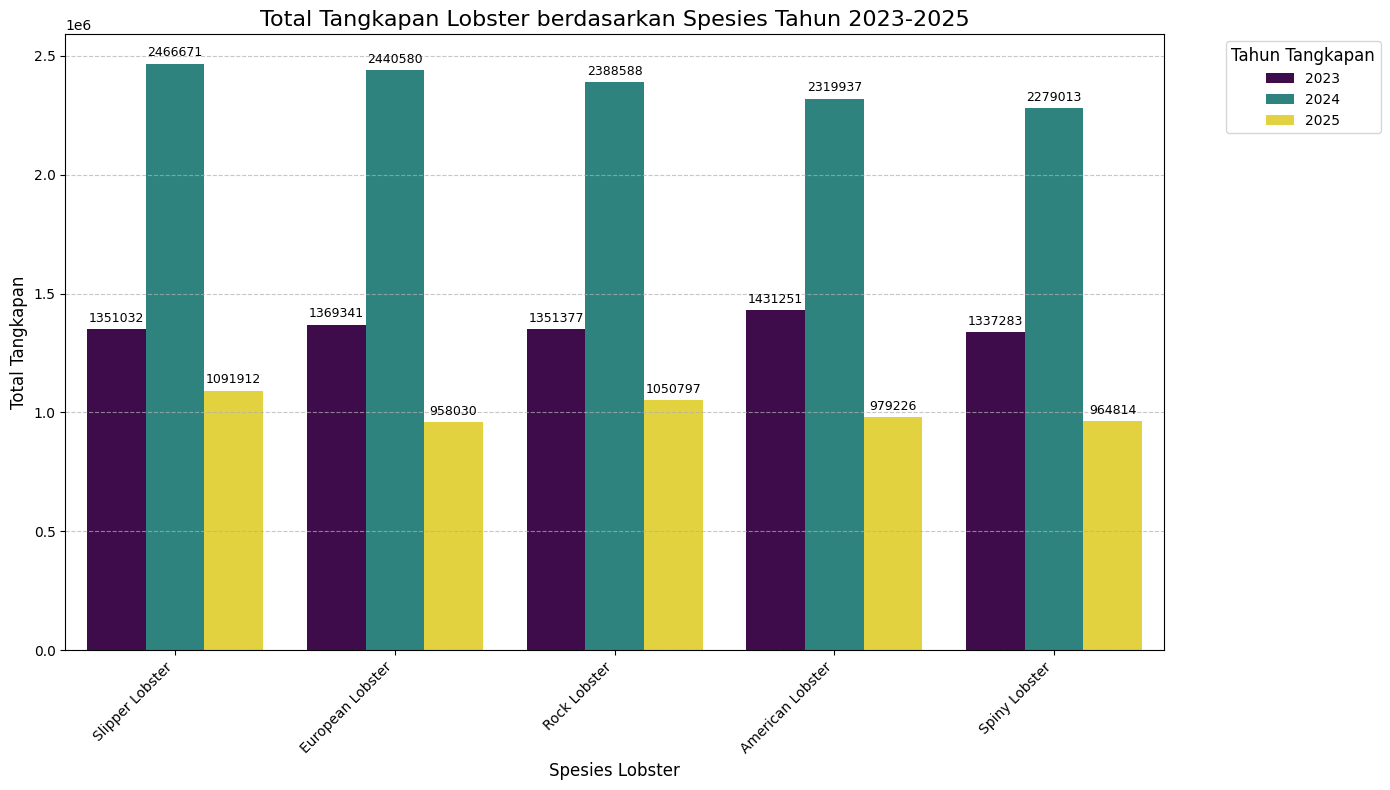

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8)) # Ukuran plot yang lebih besar agar label tidak bertumpuk
ax = sns.barplot(data=tangkapan_lobster_sum, x='species', y='total_catch', hue='catch_year', palette='viridis')

# Menambahkan keterangan nilai di atas setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge',
                 padding=3, # Jarak antara label dan bar
                 fontsize=9, # Ukuran font label
                 rotation=0) # Rotasi label agar tidak bertumpuk jika angkanya panjang
                 # Removed 'ha' parameter as it is not supported

plt.title('Total Tangkapan Lobster berdasarkan Spesies Tahun 2023-2025', fontsize=16)
plt.xlabel('Spesies Lobster', fontsize=12)
plt.ylabel('Total Tangkapan', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotasi label x agar mudah dibaca
plt.yticks(fontsize=10)
plt.legend(title='Tahun Tangkapan', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Tambahkan grid pada sumbu y
plt.tight_layout() # Menyesuaikan tata letak agar semua elemen terlihat
plt.show()

menyimpan dataset

In [ ]:
# Syntax Pandas :
pivot_table = joined_df.pivot_table(
    index='catch_method',  # Ini akan menjadi baris (setara dengan groupBy)
    columns='catch_year',  # Ini akan menjadi kolom (setara dengan pivot)
    values='total_catch_this_year', # Ini adalah nilai yang akan diagregasi
    aggfunc='sum'          # Fungsi agregasi (setara dengan agg(sum(...)))
)
pivot_table

catch_year,2023,2024,2025
catch_method,,,
Diving,1675087,3031563,1309617
Hand Picking,1684244,3040489,1253830
Trap,1768444,2938458,1265313
Trawling,1712509,2884279,1216019


**2. Total Tangkapan Lobster berdasarkan Spesies dan Metode Penangkapan'**

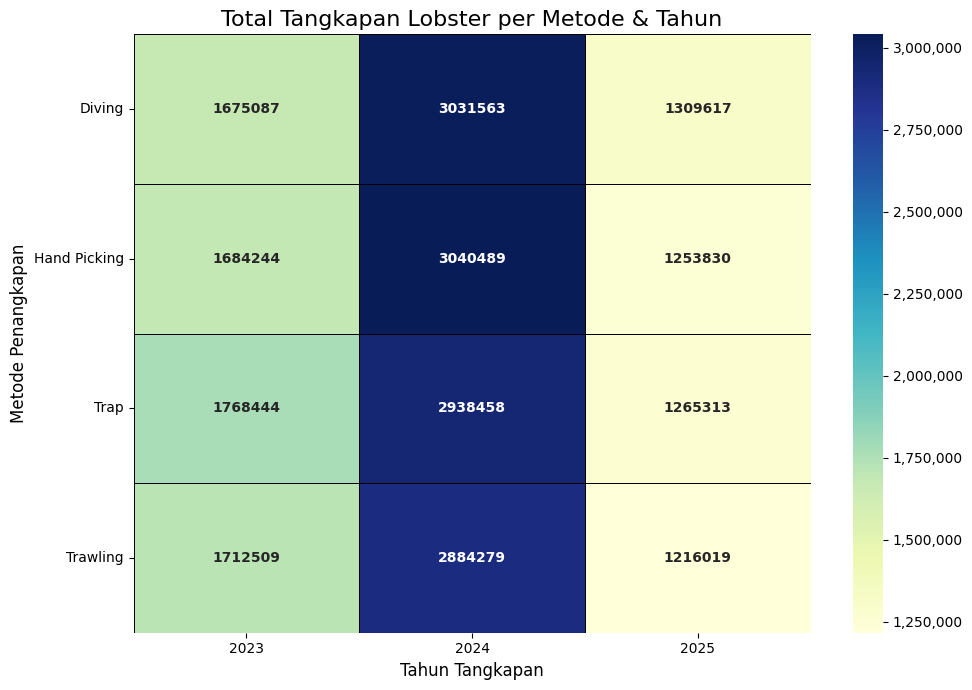

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    pivot_table,
    annot=True,        # Menampilkan nilai numerik di setiap sel
    fmt='d',           # Ganti format string ke 'd' untuk integer.
                       # Ini secara default akan menangani pemisah ribuan jika locale diset,
                       # atau bisa juga menggunakan custom formatter
    cmap='YlGnBu',     # Peta warna (YlGnBu, Blues, rocket, mako, viridis, dll.)
    linewidths=.5,     # Lebar garis antar sel
    linecolor='black', # Warna garis antar sel
    # Untuk memastikan pemisah ribulan selalu ada dan konsisten,
    # kita bisa menggunakan `fmt` dengan fungsi format kustom di `annot_kws`
    # atau menggunakan format f-string langsung di `fmt` jika versi seaborn/matplotlib mendukung penuh.
    # Namun, untuk fmt=''d' adalah yang paling aman dan seringkali sudah cukup.
    # kontrol penuh format angka di label, menggunakan annot_kws:
    annot_kws={"fontsize": 10, "fontweight": "bold"} # Removed 'fmt': "{:,.0f}"
)

#  memastikan color bar juga diformat dengan koma pemisah ribuan:
formatter = plt.FuncFormatter(lambda x, p: f'{x:,.0f}')
plt.gca().collections[0].colorbar.formatter = formatter
plt.gca().collections[0].colorbar.update_ticks()


plt.title('Total Tangkapan Lobster per Metode & Tahun', fontsize=16)
plt.xlabel('Tahun Tangkapan', fontsize=12)
plt.ylabel('Metode Penangkapan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
joined_df.to_csv('lobster_and_lobster_fishers.csv', header=True)

# INNER JOIN DATASETS KE 1 DAN 3

In [ ]:
joined_df=pd.read_csv('/content/lobster_and_lobster_fishers.csv')
joined_df

,Unnamed: 0,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,...,state,phone,email,experience_years,license_expiry,vessel_owner,crew_size,annual_quota_kg,total_catch_this_year,catch_year
0,0,LOB00001,American Lobster,2023-10-05,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,...,Illinois,454-659-2473x8532,lfranco@example.net,16,2026-02-18,True,7,4098,3631,2023
1,1,LOB00002,European Lobster,2024-08-09,28.48,561.6,16.69,Grade B,Paper Shell,Trawling,...,Virginia,223.290.7348x93467,hfitzgerald@example.org,3,2026-11-04,False,6,2767,1336,2024
2,2,LOB00003,Rock Lobster,2023-10-08,17.90,1301.7,14.04,Grade A,Paper Shell,Trap,...,Nevada,930.423.8260,xgordon@example.com,14,2025-09-21,True,1,1494,1095,2023
3,3,LOB00004,American Lobster,2024-10-25,34.84,1205.0,17.85,Grade B,Hard Shell,Hand Picking,...,Virginia,223.290.7348x93467,hfitzgerald@example.org,3,2026-11-04,False,6,2767,1336,2024
4,4,LOB00005,European Lobster,2024-09-22,35.11,1112.4,14.84,Grade A,Soft Shell,Diving,...,Texas,001-344-417-0544,kylealvarez@example.org,10,2025-12-19,True,7,1087,1754,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,LOB09996,Spiny Lobster,2025-03-12,32.65,380.5,10.04,Grade C,Soft Shell,Hand Picking,...,Nevada,+1-912-297-3129x356,brownsarah@example.org,2,2025-12-22,False,6,566,3298,2025
9996,9996,LOB09997,Rock Lobster,2023-09-24,33.84,415.2,9.72,Grade C,Soft Shell,Hand Picking,...,New York,(624)615-7094x3006,hardingwilliam@example.org,18,2026-11-13,True,8,4446,2889,2023
9997,9997,LOB09998,American Lobster,2024-04-29,15.03,1307.7,9.02,Grade C,Paper Shell,Trap,...,New Jersey,306-370-5415,karen51@example.net,37,2027-05-20,True,4,759,3144,2024
9998,9998,LOB09999,Slipper Lobster,2025-05-09,17.61,1148.3,10.44,Grade B,Peeler,Trap,...,Maine,001-342-992-8574x003,debbieedwards@example.org,35,2026-08-27,False,1,3245,2197,2025


In [ ]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   lobster_id             10000 non-null  object 
 2   species                10000 non-null  object 
 3   catch_date             10000 non-null  object 
 4   length_cm              10000 non-null  float64
 5   weight_grams           10000 non-null  float64
 6   carapace_length_cm     10000 non-null  float64
 7   grade                  10000 non-null  object 
 8   shell_condition        10000 non-null  object 
 9   catch_method           10000 non-null  object 
 10  fisher_id              10000 non-null  object 
 11  vessel_id              10000 non-null  object 
 12  fishing_ground_id      10000 non-null  object 
 13  market_price_per_kg    10000 non-null  float64
 14  is_alive               10000 non-null  bool   
 15  ins

INNER JOIN DATASET ANTARA DATASET 1,2, DAN 3

In [ ]:
joined_df2=pd.merge(joined_df,df_lobster_fishing_ground,on='fishing_ground_id',how='inner')
joined_df2

,Unnamed: 0,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,...,water_depth_meters,water_type,average_temperature_c,lobster_density_per_sqkm,seasonal_closure,protected_area,distance_from_shore_km,bottom_type,current_strength,accessibility_rating
0,0,LOB00001,American Lobster,2023-10-05,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,...,186,Deep Water,8.5,417,True,False,59.9,Rocky,Moderate,2
1,1,LOB00002,European Lobster,2024-08-09,28.48,561.6,16.69,Grade B,Paper Shell,Trawling,...,183,Deep Water,13.6,201,True,True,47.1,Mixed,Strong,5
2,2,LOB00003,Rock Lobster,2023-10-08,17.90,1301.7,14.04,Grade A,Paper Shell,Trap,...,177,Sandy Bottom,17.9,219,True,True,23.6,Sandy,Moderate,3
3,3,LOB00004,American Lobster,2024-10-25,34.84,1205.0,17.85,Grade B,Hard Shell,Hand Picking,...,29,Continental Shelf,14.7,226,False,True,36.5,Rocky,Moderate,9
4,4,LOB00005,European Lobster,2024-09-22,35.11,1112.4,14.84,Grade A,Soft Shell,Diving,...,41,Coastal,11.8,327,True,False,45.3,Rocky,Weak,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,LOB09996,Spiny Lobster,2025-03-12,32.65,380.5,10.04,Grade C,Soft Shell,Hand Picking,...,192,Coastal,14.3,299,False,False,43.3,Rocky,Weak,6
9996,9996,LOB09997,Rock Lobster,2023-09-24,33.84,415.2,9.72,Grade C,Soft Shell,Hand Picking,...,31,Coastal,17.9,333,False,True,94.2,Mixed,Moderate,3
9997,9997,LOB09998,American Lobster,2024-04-29,15.03,1307.7,9.02,Grade C,Paper Shell,Trap,...,192,Coastal,14.3,299,False,False,43.3,Rocky,Weak,6
9998,9998,LOB09999,Slipper Lobster,2025-05-09,17.61,1148.3,10.44,Grade B,Peeler,Trap,...,143,Coastal,14.3,169,False,True,94.3,Rocky,Weak,1


In [ ]:
joined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10000 non-null  int64  
 1   lobster_id                10000 non-null  object 
 2   species                   10000 non-null  object 
 3   catch_date                10000 non-null  object 
 4   length_cm                 10000 non-null  float64
 5   weight_grams              10000 non-null  float64
 6   carapace_length_cm        10000 non-null  float64
 7   grade                     10000 non-null  object 
 8   shell_condition           10000 non-null  object 
 9   catch_method              10000 non-null  object 
 10  fisher_id                 10000 non-null  object 
 11  vessel_id                 10000 non-null  object 
 12  fishing_ground_id         10000 non-null  object 
 13  market_price_per_kg       10000 non-null  float64
 14  is_aliv

In [ ]:
joined_df2.iloc[:,29:]# MEMFILTER UNTUK MELIHAT KOLOM DARI 29 HINGGA AKHIR

,total_catch_this_year,catch_year,ground_name,latitude,longitude,water_depth_meters,water_type,average_temperature_c,lobster_density_per_sqkm,seasonal_closure,protected_area,distance_from_shore_km,bottom_type,current_strength,accessibility_rating
0,3631,2023,Lake Melissa Ridge,43.151354,-70.060466,186,Deep Water,8.5,417,True,False,59.9,Rocky,Moderate,2
1,1336,2024,Keychester Shelf,41.234383,-73.786059,183,Deep Water,13.6,201,True,True,47.1,Mixed,Strong,5
2,1095,2023,Mckinneyport Shelf,42.243998,-71.638338,177,Sandy Bottom,17.9,219,True,True,23.6,Sandy,Moderate,3
3,1336,2024,West Benjaminborough Ground,37.864626,-67.354359,29,Continental Shelf,14.7,226,False,True,36.5,Rocky,Moderate,9
4,1754,2024,Joshuaton Area,35.973523,-70.581948,41,Coastal,11.8,327,True,False,45.3,Rocky,Weak,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3298,2025,West Ashley Shelf,37.701107,-68.981238,192,Coastal,14.3,299,False,False,43.3,Rocky,Weak,6
9996,2889,2023,North Brandiberg Area,35.569966,-72.575325,31,Coastal,17.9,333,False,True,94.2,Mixed,Moderate,3
9997,3144,2024,West Ashley Shelf,37.701107,-68.981238,192,Coastal,14.3,299,False,False,43.3,Rocky,Weak,6
9998,2197,2025,New Melissa Banks,45.446216,-69.982816,143,Coastal,14.3,169,False,True,94.3,Rocky,Weak,1


In [ ]:
joined_df2.iloc[:,:29]#MEMFILTER UNTUK MELIHAT KOLOM DARI 0 HINGGA 29

,Unnamed: 0,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,...,address,city,state,phone,email,experience_years,license_expiry,vessel_owner,crew_size,annual_quota_kg
0,0,LOB00001,American Lobster,2023-10-05,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,...,"74293 Jessica Fall Suite 387\nNorth Eric, ND 0...",West David,Illinois,454-659-2473x8532,lfranco@example.net,16,2026-02-18,True,7,4098
1,1,LOB00002,European Lobster,2024-08-09,28.48,561.6,16.69,Grade B,Paper Shell,Trawling,...,"3871 Vanessa Parks Suite 678\nLisamouth, HI 98121",North Deborahborough,Virginia,223.290.7348x93467,hfitzgerald@example.org,3,2026-11-04,False,6,2767
2,2,LOB00003,Rock Lobster,2023-10-08,17.90,1301.7,14.04,Grade A,Paper Shell,Trap,...,"9297 Phillip Vista\nEast Kennethland, OH 67669",Stewartmouth,Nevada,930.423.8260,xgordon@example.com,14,2025-09-21,True,1,1494
3,3,LOB00004,American Lobster,2024-10-25,34.84,1205.0,17.85,Grade B,Hard Shell,Hand Picking,...,"3871 Vanessa Parks Suite 678\nLisamouth, HI 98121",North Deborahborough,Virginia,223.290.7348x93467,hfitzgerald@example.org,3,2026-11-04,False,6,2767
4,4,LOB00005,European Lobster,2024-09-22,35.11,1112.4,14.84,Grade A,Soft Shell,Diving,...,"5722 Mueller Terrace\nPetersonport, AR 45831",North Jennifer,Texas,001-344-417-0544,kylealvarez@example.org,10,2025-12-19,True,7,1087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,LOB09996,Spiny Lobster,2025-03-12,32.65,380.5,10.04,Grade C,Soft Shell,Hand Picking,...,1454 Williams Lakes Apt. 433\nSouth Teresabury...,South Johnmouth,Nevada,+1-912-297-3129x356,brownsarah@example.org,2,2025-12-22,False,6,566
9996,9996,LOB09997,Rock Lobster,2023-09-24,33.84,415.2,9.72,Grade C,Soft Shell,Hand Picking,...,"21344 Martin Plaza\nSharonburgh, KS 02175",Romeroton,New York,(624)615-7094x3006,hardingwilliam@example.org,18,2026-11-13,True,8,4446
9997,9997,LOB09998,American Lobster,2024-04-29,15.03,1307.7,9.02,Grade C,Paper Shell,Trap,...,"922 Paul Forks Apt. 110\nLake William, WY 21984",Sarahchester,New Jersey,306-370-5415,karen51@example.net,37,2027-05-20,True,4,759
9998,9998,LOB09999,Slipper Lobster,2025-05-09,17.61,1148.3,10.44,Grade B,Peeler,Trap,...,5634 Bowen Squares Suite 516\nWest Jefferymout...,Pachecomouth,Maine,001-342-992-8574x003,debbieedwards@example.org,35,2026-08-27,False,1,3245


**3. melihat jumlah penangkapan lobster berdasarkan species dan type air**

In [ ]:
#pivot tabel untuk melihat jumlah penangkapan lobster berdasarkan species dan type air
pivott=joined_df2.pivot_table(values='total_catch_this_year',index='species',columns='water_type',aggfunc='sum')
pivott

water_type,Coastal,Continental Shelf,Deep Water,Rocky Bottom,Sandy Bottom
species,,,,,
American Lobster,1444083,1001493,1169907,544417,570514
European Lobster,1475510,1012382,1122411,552274,605374
Rock Lobster,1529292,917649,1219016,522909,601896
Slipper Lobster,1536801,1051827,1148966,619837,552184
Spiny Lobster,1475129,885875,1038532,619809,561765


**visualisasi jumlah penangkapan lobster berdasarkan species dan type air**

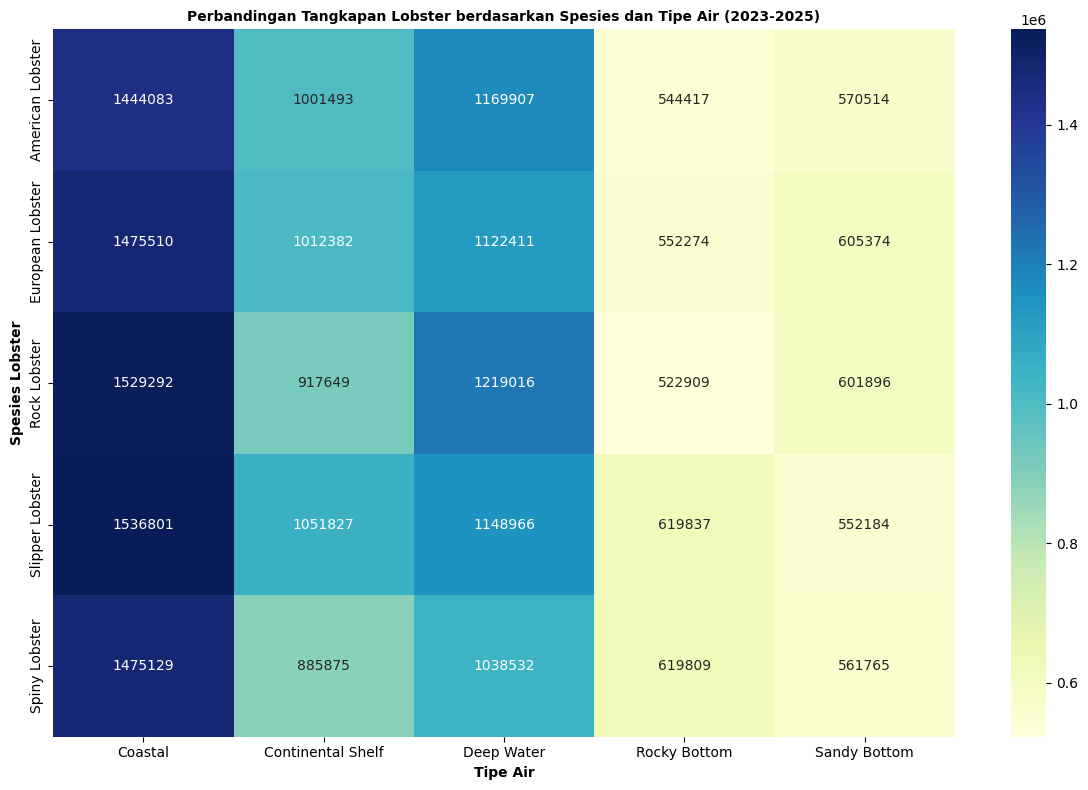

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(pivott, annot=True, fmt=".0f", cmap="YlGnBu")
plt.ylabel('Spesies Lobster', fontweight='bold')
plt.xlabel('Tipe Air', fontweight='bold')
plt.title('Perbandingan Tangkapan Lobster berdasarkan Spesies dan Tipe Air (2023-2025)', fontweight='bold', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
joined_df2['water_type'].value_counts()

,count
water_type,
Coastal,3136
Deep Water,2406
Continental Shelf,2040
Sandy Bottom,1235
Rocky Bottom,1183


**4. melihat apakah total penangkapan lobster dari tahun ke tahun berada dalam musimnya/tidak**

In [ ]:
#grouping untuk melihat apakah total penangkapan lobster dari tahun ke tahun berada dalam musimnya/tidak
musim=joined_df2.groupby(['species','seasonal_closure'])['total_catch_this_year'].sum()
musim

species           seasonal_closure
American Lobster  False               3096039
                  True                1634375
European Lobster  False               3089389
                  True                1678562
Rock Lobster      False               3113487
                  True                1677275
Slipper Lobster   False               3130952
                  True                1778663
Spiny Lobster     False               2893589
                  True                1687521
Name: total_catch_this_year, dtype: int64

VISUALISASI mtotal penangkapan lobster dari tahun ke tahun berada dalam musimnya/tidak*

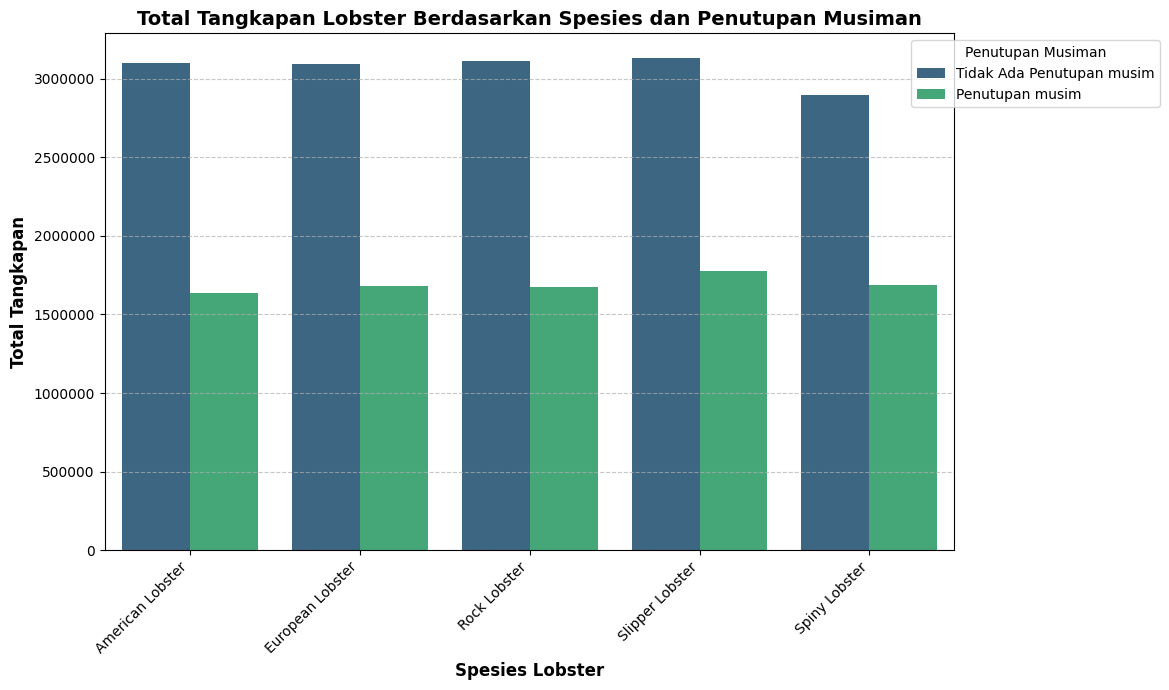

In [ ]:

#  Mengubah Series 'musim' menjadi DataFrame
# Ini diperlukan agar kolom 'species' dan 'seasonal_closure' bisa diakses sebagai kolom terpisah
# untuk plotting dengan seaborn.
df_musim_plot = musim.reset_index()

plt.figure(figsize=(12, 7)) # Mengatur ukuran figure agar lebih mudah dibaca

# Membuat bar chart berkelompok
sns.barplot(
    x='species',
    y='total_catch_this_year',
    hue='seasonal_closure',  # Kolom ini akan digunakan untuk membuat kelompok bar (True/False)
    data=df_musim_plot,
    palette='viridis'        # Pilihan skema warna, 'viridis' atau 'plasma' bagus
)

# Menambahkan judul dan label sumbu
plt.xlabel('Spesies Lobster', fontsize=12, fontweight='bold')
plt.ylabel('Total Tangkapan', fontsize=12, fontweight='bold')
plt.title('Total Tangkapan Lobster Berdasarkan Spesies dan Penutupan Musiman', fontsize=14, fontweight='bold')

# Memutar label sumbu X agar tidak tumpang tindih
plt.xticks(rotation=45, ha='right')

# Mengatur format label sumbu Y agar tidak menggunakan notasi ilmiah jika angka besar
plt.ticklabel_format(style='plain', axis='y')

# Menambahkan grid horizontal untuk memudahkan pembacaan nilai
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur legenda (keterangan)
# Mengganti label True/False menjadi lebih deskriptif
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Tidak Ada Penutupan musim', 'Penutupan musim'] # Ganti 'False' dan 'True'

plt.legend(
    handles=handles,
    labels=new_labels,
    title='Penutupan Musiman', # Judul untuk legenda
    loc='upper right',         # Posisi legenda
    bbox_to_anchor=(1.25, 1)   # Memindahkan legenda keluar dari area plot agar tidak menutupi bar
)

plt.tight_layout() # Menyesuaikan layout agar semua elemen pas dan tidak terpotong
plt.show()

Menyimpan hasil join dataset dari
content lobster and lobster fishers, /content lobster fishinggrounds dataset

In [ ]:
joined_df.to_csv('lobster_and_lobster_fishers_and_lobster_fishing_ground.csv', header=True)

In [ ]:
joined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10000 non-null  int64  
 1   lobster_id                10000 non-null  object 
 2   species                   10000 non-null  object 
 3   catch_date                10000 non-null  object 
 4   length_cm                 10000 non-null  float64
 5   weight_grams              10000 non-null  float64
 6   carapace_length_cm        10000 non-null  float64
 7   grade                     10000 non-null  object 
 8   shell_condition           10000 non-null  object 
 9   catch_method              10000 non-null  object 
 10  fisher_id                 10000 non-null  object 
 11  vessel_id                 10000 non-null  object 
 12  fishing_ground_id         10000 non-null  object 
 13  market_price_per_kg       10000 non-null  float64
 14  is_aliv

# INNER JOIN DATASETS KE 1 DAN 4

MENGGABUNGKAN DARI  DATASET 1,2,3, DAN 4

In [ ]:
joined_df3=pd.merge(joined_df2,df_lobster_marketsales,on='lobster_id',how='inner')
joined_df3

,Unnamed: 0,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,...,sale_channel,quantity_sold_kg,price_per_kg,transport_cost,commission_percent,payment_terms,delivery_location,customer_rating,total_sale_value,net_profit
0,0,LOB00001,American Lobster,2023-10-05,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,...,Contract,1.08,30.39,9.23,6.6,Net 15,New Jennifertown,5,32.8212,21.425001
1,1,LOB00002,European Lobster,2024-08-09,28.48,561.6,16.69,Grade B,Paper Shell,Trawling,...,Direct Sale,0.71,36.62,23.42,8.4,Net 30,South Joyville,3,26.0002,0.396183
2,3,LOB00004,American Lobster,2024-10-25,34.84,1205.0,17.85,Grade B,Hard Shell,Hand Picking,...,Auction,1.20,85.87,5.33,11.0,Net 15,Port Kristen,2,103.0440,86.379160
3,4,LOB00005,European Lobster,2024-09-22,35.11,1112.4,14.84,Grade A,Soft Shell,Diving,...,Contract,1.14,63.54,36.06,9.7,Net 15,Kennedybury,4,72.4356,29.349347
4,5,LOB00006,European Lobster,2024-01-26,39.65,1246.6,12.01,Grade A,Soft Shell,Trawling,...,Direct Sale,0.82,50.53,32.10,6.8,Net 15,Lake Diane,4,41.4346,6.517047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9995,LOB09996,Spiny Lobster,2025-03-12,32.65,380.5,10.04,Grade C,Soft Shell,Hand Picking,...,Online Platform,0.21,79.82,36.75,15.0,COD,Lake Anthonyhaven,2,16.7622,-22.502130
7996,9996,LOB09997,Rock Lobster,2023-09-24,33.84,415.2,9.72,Grade C,Soft Shell,Hand Picking,...,Contract,1.27,59.02,26.20,13.1,COD,Jessicaport,1,74.9554,38.936243
7997,9997,LOB09998,American Lobster,2024-04-29,15.03,1307.7,9.02,Grade C,Paper Shell,Trap,...,Contract,1.07,84.61,34.67,14.4,Cash,West Samuel,3,90.5327,42.825991
7998,9998,LOB09999,Slipper Lobster,2025-05-09,17.61,1148.3,10.44,Grade B,Peeler,Trap,...,Contract,0.82,51.58,44.62,8.6,COD,East Jessicaville,2,42.2956,-5.961822


In [ ]:
#mengganti format sale_date dari tahun menjadi tahun bulan
joined_df3['sale_date']=pd.to_datetime(joined_df3['sale_date'])
joined_df3['sale_year']=joined_df3['sale_date'].dt.year
joined_df3

,Unnamed: 0,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,...,quantity_sold_kg,price_per_kg,transport_cost,commission_percent,payment_terms,delivery_location,customer_rating,total_sale_value,net_profit,sale_year
0,0,LOB00001,American Lobster,2023-10-05,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,...,1.08,30.39,9.23,6.6,Net 15,New Jennifertown,5,32.8212,21.425001,2024
1,1,LOB00002,European Lobster,2024-08-09,28.48,561.6,16.69,Grade B,Paper Shell,Trawling,...,0.71,36.62,23.42,8.4,Net 30,South Joyville,3,26.0002,0.396183,2024
2,3,LOB00004,American Lobster,2024-10-25,34.84,1205.0,17.85,Grade B,Hard Shell,Hand Picking,...,1.20,85.87,5.33,11.0,Net 15,Port Kristen,2,103.0440,86.379160,2024
3,4,LOB00005,European Lobster,2024-09-22,35.11,1112.4,14.84,Grade A,Soft Shell,Diving,...,1.14,63.54,36.06,9.7,Net 15,Kennedybury,4,72.4356,29.349347,2025
4,5,LOB00006,European Lobster,2024-01-26,39.65,1246.6,12.01,Grade A,Soft Shell,Trawling,...,0.82,50.53,32.10,6.8,Net 15,Lake Diane,4,41.4346,6.517047,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9995,LOB09996,Spiny Lobster,2025-03-12,32.65,380.5,10.04,Grade C,Soft Shell,Hand Picking,...,0.21,79.82,36.75,15.0,COD,Lake Anthonyhaven,2,16.7622,-22.502130,2024
7996,9996,LOB09997,Rock Lobster,2023-09-24,33.84,415.2,9.72,Grade C,Soft Shell,Hand Picking,...,1.27,59.02,26.20,13.1,COD,Jessicaport,1,74.9554,38.936243,2025
7997,9997,LOB09998,American Lobster,2024-04-29,15.03,1307.7,9.02,Grade C,Paper Shell,Trap,...,1.07,84.61,34.67,14.4,Cash,West Samuel,3,90.5327,42.825991,2025
7998,9998,LOB09999,Slipper Lobster,2025-05-09,17.61,1148.3,10.44,Grade B,Peeler,Trap,...,0.82,51.58,44.62,8.6,COD,East Jessicaville,2,42.2956,-5.961822,2024


In [ ]:
joined_df3.info()# MENGECEK APAKAH BERHASIL/TIDAK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                8000 non-null   int64         
 1   lobster_id                8000 non-null   object        
 2   species                   8000 non-null   object        
 3   catch_date                8000 non-null   object        
 4   length_cm                 8000 non-null   float64       
 5   weight_grams              8000 non-null   float64       
 6   carapace_length_cm        8000 non-null   float64       
 7   grade                     8000 non-null   object        
 8   shell_condition           8000 non-null   object        
 9   catch_method              8000 non-null   object        
 10  fisher_id                 8000 non-null   object        
 11  vessel_id                 8000 non-null   object        
 12  fishing_ground_id   

In [ ]:
joined_df3.iloc[:,43:]# MEMFILTER KOLOM, DARI KOLOM 43 HINGGA AKHIR KOLOM

,accessibility_rating,sale_id,sale_date,buyer_name,sale_channel,quantity_sold_kg,price_per_kg,transport_cost,commission_percent,payment_terms,delivery_location,customer_rating,total_sale_value,net_profit,sale_year
0,2,SALE02966,2024-10-29,Seafood Market A,Contract,1.08,30.39,9.23,6.6,Net 15,New Jennifertown,5,32.8212,21.425001,2024
1,5,SALE04742,2024-10-18,Restaurant Chain B,Direct Sale,0.71,36.62,23.42,8.4,Net 30,South Joyville,3,26.0002,0.396183,2024
2,9,SALE05981,2024-09-12,Local Distributor D,Auction,1.20,85.87,5.33,11.0,Net 15,Port Kristen,2,103.0440,86.379160,2024
3,3,SALE04395,2025-03-02,Local Distributor D,Contract,1.14,63.54,36.06,9.7,Net 15,Kennedybury,4,72.4356,29.349347,2025
4,5,SALE05068,2025-05-29,Processing Plant E,Direct Sale,0.82,50.53,32.10,6.8,Net 15,Lake Diane,4,41.4346,6.517047,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,6,SALE01998,2024-06-07,Export Company C,Online Platform,0.21,79.82,36.75,15.0,COD,Lake Anthonyhaven,2,16.7622,-22.502130,2024
7996,3,SALE07217,2025-01-27,Local Distributor D,Contract,1.27,59.02,26.20,13.1,COD,Jessicaport,1,74.9554,38.936243,2025
7997,6,SALE02352,2025-05-04,Seafood Market A,Contract,1.07,84.61,34.67,14.4,Cash,West Samuel,3,90.5327,42.825991,2025
7998,1,SALE05670,2024-07-15,Restaurant Chain B,Contract,0.82,51.58,44.62,8.6,COD,East Jessicaville,2,42.2956,-5.961822,2024


In [ ]:
joined_df3.iloc[:,:43]#MEMFILTER KOLOM, DARI KOLOM 0 HINGGA KOLOM KE 43

,Unnamed: 0,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,...,longitude,water_depth_meters,water_type,average_temperature_c,lobster_density_per_sqkm,seasonal_closure,protected_area,distance_from_shore_km,bottom_type,current_strength
0,0,LOB00001,American Lobster,2023-10-05,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,...,-70.060466,186,Deep Water,8.5,417,True,False,59.9,Rocky,Moderate
1,1,LOB00002,European Lobster,2024-08-09,28.48,561.6,16.69,Grade B,Paper Shell,Trawling,...,-73.786059,183,Deep Water,13.6,201,True,True,47.1,Mixed,Strong
2,3,LOB00004,American Lobster,2024-10-25,34.84,1205.0,17.85,Grade B,Hard Shell,Hand Picking,...,-67.354359,29,Continental Shelf,14.7,226,False,True,36.5,Rocky,Moderate
3,4,LOB00005,European Lobster,2024-09-22,35.11,1112.4,14.84,Grade A,Soft Shell,Diving,...,-70.581948,41,Coastal,11.8,327,True,False,45.3,Rocky,Weak
4,5,LOB00006,European Lobster,2024-01-26,39.65,1246.6,12.01,Grade A,Soft Shell,Trawling,...,-67.187770,75,Sandy Bottom,10.0,145,False,False,74.4,Muddy,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9995,LOB09996,Spiny Lobster,2025-03-12,32.65,380.5,10.04,Grade C,Soft Shell,Hand Picking,...,-68.981238,192,Coastal,14.3,299,False,False,43.3,Rocky,Weak
7996,9996,LOB09997,Rock Lobster,2023-09-24,33.84,415.2,9.72,Grade C,Soft Shell,Hand Picking,...,-72.575325,31,Coastal,17.9,333,False,True,94.2,Mixed,Moderate
7997,9997,LOB09998,American Lobster,2024-04-29,15.03,1307.7,9.02,Grade C,Paper Shell,Trap,...,-68.981238,192,Coastal,14.3,299,False,False,43.3,Rocky,Weak
7998,9998,LOB09999,Slipper Lobster,2025-05-09,17.61,1148.3,10.44,Grade B,Peeler,Trap,...,-69.982816,143,Coastal,14.3,169,False,True,94.3,Rocky,Weak


In [ ]:
joined_df3['sale_id'].nunique()#MENGECEK NILAI DARI KOLOM SALE_ID, YANG MEMILIKI NILAI UNIQUE

8000

5.. **Mengitung Tren Nilai Penjualan Total berdasarkan Spesies Lobster (2024-2025)**

In [ ]:
sales_date_year=joined_df3.groupby(['species','sale_year'])['total_sale_value'].sum().reset_index().sort_values(by='sale_year')


sales_date_year

,species,sale_year,total_sale_value
0,American Lobster,2024,45929.4649
2,European Lobster,2024,49564.1492
6,Slipper Lobster,2024,48478.3913
4,Rock Lobster,2024,48991.1121
8,Spiny Lobster,2024,46018.4740
3,European Lobster,2025,34308.9030
5,Rock Lobster,2025,34046.9871
1,American Lobster,2025,34756.7866
7,Slipper Lobster,2025,33623.1011
9,Spiny Lobster,2025,32162.3670


TIDAK ADAK DATA PENJUALAN DI TAHUN 2023

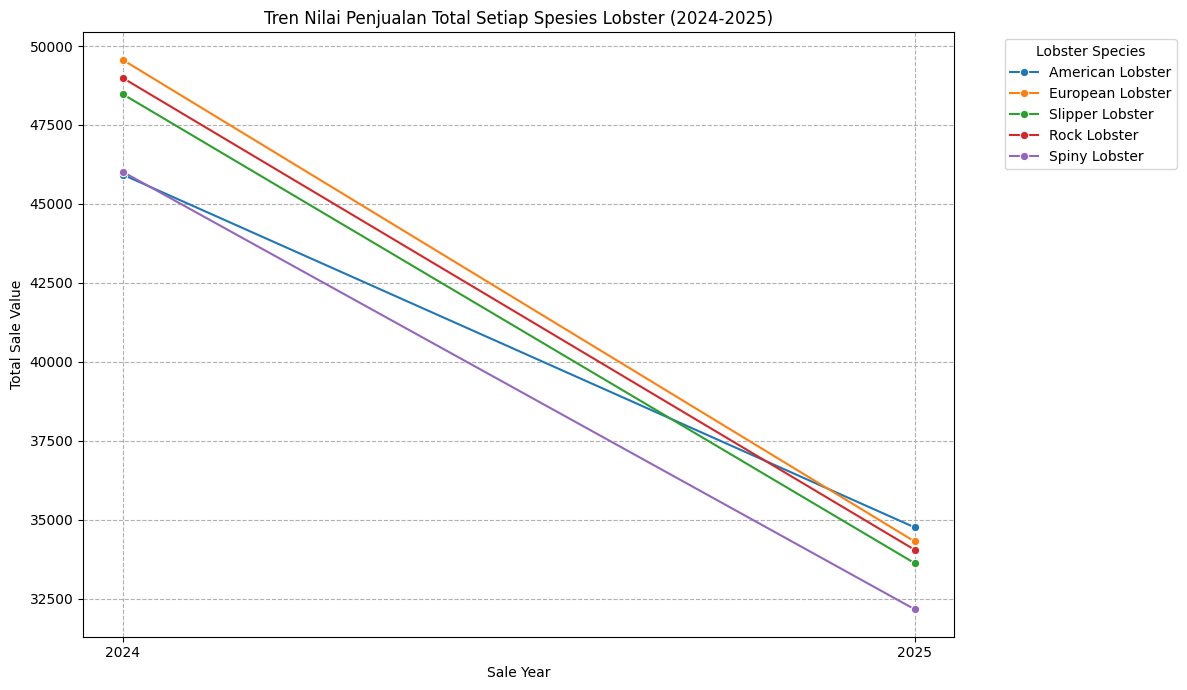

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=sales_date_year, x='sale_year', y='total_sale_value', hue='species', marker='o', palette='tab10')
plt.title('Tren Nilai Penjualan Total Setiap Spesies Lobster (2024-2025)')
plt.xlabel('Sale Year')
plt.ylabel('Total Sale Value')
plt.xticks(sales_date_year['sale_year'].unique()) # Ensure only 2024 and 2025 are shown on x-axis
plt.grid(True, linestyle='--')
plt.legend(title='Lobster Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
price=joined_df3.groupby(['species','sale_year'])['quantity_sold_kg'].sum().sort_values()
price

,,quantity_sold_kg
species,sale_year,
Spiny Lobster,2025,540.36
American Lobster,2025,563.08
European Lobster,2025,567.57
Rock Lobster,2025,569.70
Slipper Lobster,2025,576.94
American Lobster,2024,760.07
Spiny Lobster,2024,773.08
Rock Lobster,2024,804.42
Slipper Lobster,2024,808.53


**6.Menghitung Kuantitas Terjual berdasarkan Spesies (2024 vs 2025)'**

---



In [ ]:
quantity=joined_df3.groupby(['species','sale_year'])['quantity_sold_kg'].sum()
quantity

species           sale_year
American Lobster  2024         760.07
                  2025         563.08
European Lobster  2024         822.62
                  2025         567.57
Rock Lobster      2024         804.42
                  2025         569.70
Slipper Lobster   2024         808.53
                  2025         576.94
Spiny Lobster     2024         773.08
                  2025         540.36
Name: quantity_sold_kg, dtype: float64

** Visualisasi Kuantitas Terjual per Spesies dan Tahun**

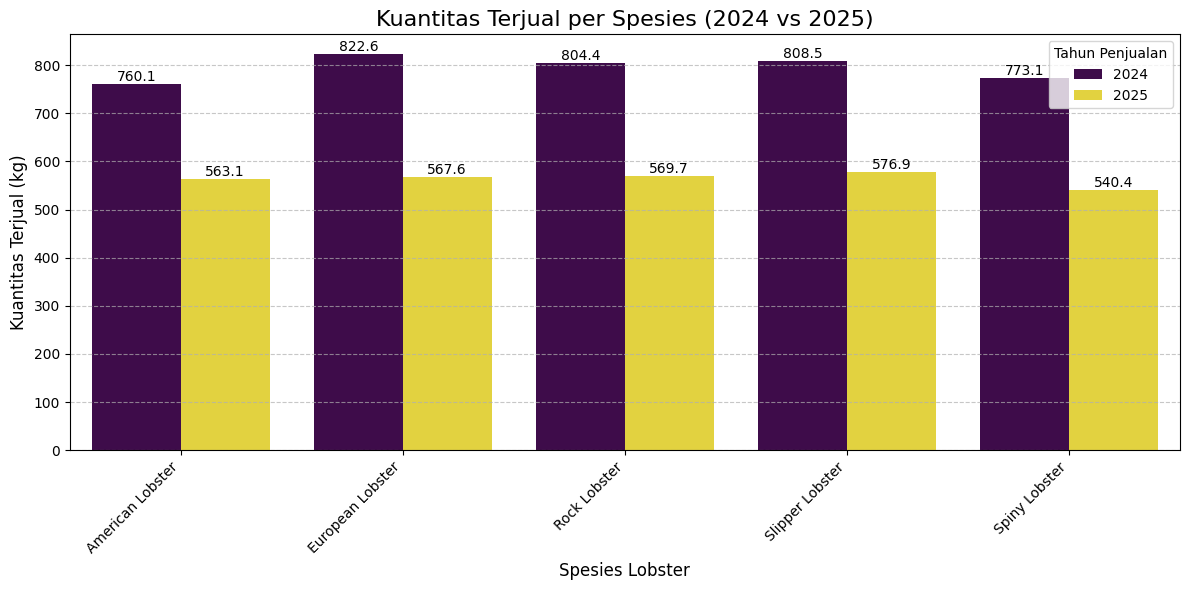

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))

quantity_df = quantity.reset_index() # Convert Series to DataFrame
ax1 = sns.barplot(data=quantity_df, x='species', y='quantity_sold_kg', hue='sale_year', palette='viridis') # Use the DataFrame and correct y-axis
plt.title('Kuantitas Terjual per Spesies (2024 vs 2025)', fontsize=16)
plt.xlabel('Spesies Lobster', fontsize=12)
plt.ylabel('Kuantitas Terjual (kg)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label X agar tidak tumpang tindih
plt.legend(title='Tahun Penjualan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Menambahkan label di atas setiap bar
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f') # fmt='%.1f' untuk 1 angka di belakang koma

plt.tight_layout()
plt.show()
plt.tight_layout() # Menyesuaikan layout agar semua elemen terlihat
plt.show()

**7.  Menghitung Rata-rata harga per kg berdasarkan Spesies (2024 vs 2025)**

In [ ]:
price=joined_df3.groupby(['species','sale_year'])['price_per_kg'].median()
price

species           sale_year
American Lobster  2024         61.810
                  2025         61.885
European Lobster  2024         59.635
                  2025         61.540
Rock Lobster      2024         60.520
                  2025         59.400
Slipper Lobster   2024         59.800
                  2025         58.610
Spiny Lobster     2024         59.645
                  2025         58.310
Name: price_per_kg, dtype: float64

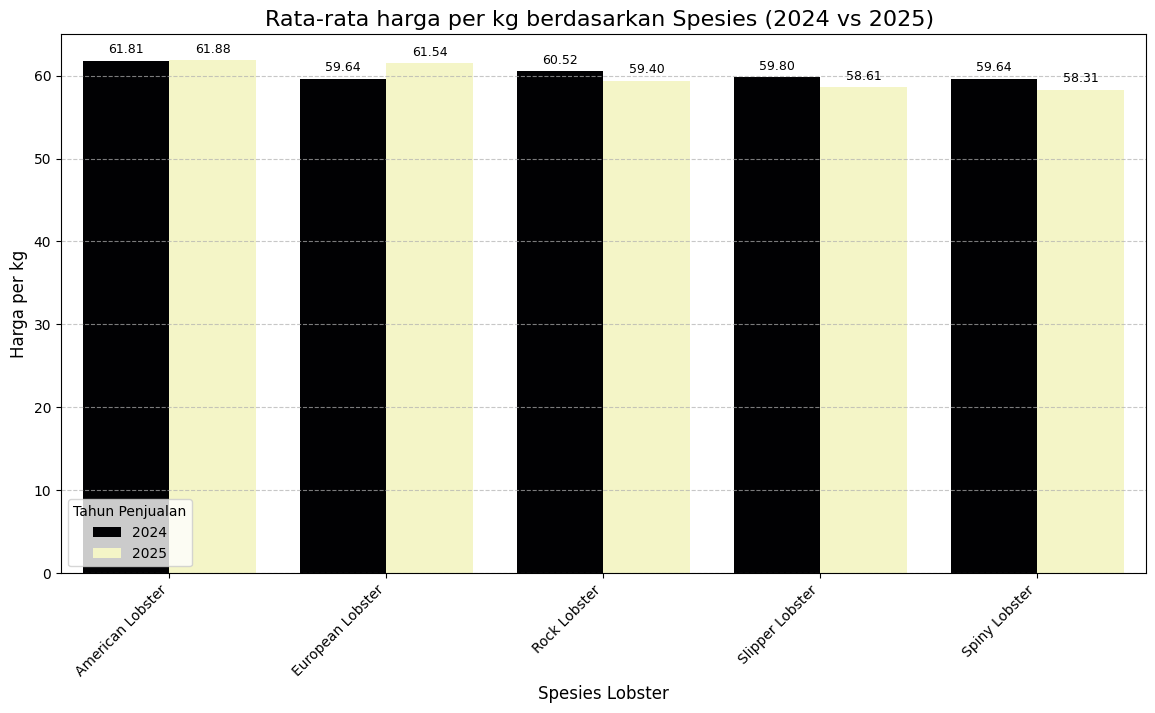

In [ ]:
plt.figure(figsize=(14, 7)) # Perlebar sedikit

price_df=price.reset_index()
ax2 = sns.barplot(data=price_df, x='species', y='price_per_kg', hue='sale_year', palette='magma')

plt.title('Rata-rata harga per kg berdasarkan Spesies (2024 vs 2025) ', fontsize=16)
plt.xlabel('Spesies Lobster', fontsize=12)
plt.ylabel('Harga per kg', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tahun Penjualan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# --- BAGIAN PENTING: Menambahkan label di atas setiap bar ---
for container in ax2.containers:
    # Menggunakan f-string untuk format mata uang yang lebih mudah dibaca
    # Menampilkan 2 angka di belakang koma dan menambahkan pemisah ribuan
    ax2.bar_label(container, fmt='%.2f', fontsize=9, color='black', padding=3) # Mengatur format, ukuran font, warna, dan jarak


**Menyimpan hasil dataset dari 1,2,3 dan 4**

In [ ]:
joined_df3.to_csv('lobster_and_lobster_fishers_and_lobster_fishing_ground_and_lobster_market_sales.csv', header=True)


In [ ]:
joined_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                8000 non-null   int64         
 1   lobster_id                8000 non-null   object        
 2   species                   8000 non-null   object        
 3   catch_date                8000 non-null   object        
 4   length_cm                 8000 non-null   float64       
 5   weight_grams              8000 non-null   float64       
 6   carapace_length_cm        8000 non-null   float64       
 7   grade                     8000 non-null   object        
 8   shell_condition           8000 non-null   object        
 9   catch_method              8000 non-null   object        
 10  fisher_id                 8000 non-null   object        
 11  vessel_id                 8000 non-null   object        
 12  fishing_ground_id   

# INNER JOIN DATASETS KE 1 DAN 5

In [ ]:
joined_df4=pd.merge(joined_df3,df_lobster_quality,on='lobster_id',how='inner')
joined_df4

,Unnamed: 0,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,...,visual_inspection,size_compliance,shell_integrity,meat_quality,parasite_check,contamination_test,overall_result,inspection_cost,certificate_issued,notes
0,0,LOB00001,American Lobster,2023-10-05,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,...,Fail,True,Fair,Standard,Minor,Positive,Pass,13.02,True,Evening family eight say whom instead. After s...
1,13,LOB00014,European Lobster,2024-09-26,31.18,1140.4,16.82,Reject,Soft Shell,Hand Picking,...,Conditional Pass,False,Good,Below Standard,Minor,Positive,Conditional Pass,22.39,False,Size community decide position. In add pull be...
2,17,LOB00018,Slipper Lobster,2023-10-24,34.86,832.7,9.90,Grade B,Hard Shell,Trap,...,Conditional Pass,True,Poor,Premium,Significant,Positive,Fail,13.86,False,News system dark bring student. Small write op...
3,39,LOB00040,Rock Lobster,2025-03-29,19.07,800.2,8.50,Reject,Peeler,Diving,...,Conditional Pass,True,Poor,Premium,Minor,Negative,Retest Required,11.91,True,Wait what cost beyond rock painting view. Cent...
4,43,LOB00044,Slipper Lobster,2024-12-14,39.17,1235.1,13.66,Grade A,Peeler,Hand Picking,...,Conditional Pass,False,Poor,Standard,Clear,Negative,Conditional Pass,15.31,False,Participant especially special sing while it. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,9924,LOB09925,Rock Lobster,2024-11-08,38.36,205.2,11.20,Grade C,Hard Shell,Trawling,...,Pass,False,Poor,Standard,Clear,Positive,Conditional Pass,7.36,False,Art purpose before war lead big push.
622,9935,LOB09936,Slipper Lobster,2023-08-11,42.10,524.1,11.82,Reject,Paper Shell,Trap,...,Fail,False,Fair,Standard,Clear,Negative,Fail,12.22,True,Language edge start. Bad participant role. Edu...
623,9953,LOB09954,Spiny Lobster,2024-04-15,26.27,215.8,16.55,Grade A,Hard Shell,Trap,...,Conditional Pass,True,Good,Below Standard,Clear,Positive,Pass,23.66,False,Would consumer study. Machine exist miss all. ...
624,9976,LOB09977,American Lobster,2024-08-21,28.58,1020.0,10.04,Grade A,Paper Shell,Hand Picking,...,Retest Required,True,Poor,Premium,Clear,Negative,Retest Required,6.37,False,Us across five direction back. Stock group tri...


In [ ]:
joined_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                626 non-null    int64         
 1   lobster_id                626 non-null    object        
 2   species                   626 non-null    object        
 3   catch_date                626 non-null    object        
 4   length_cm                 626 non-null    float64       
 5   weight_grams              626 non-null    float64       
 6   carapace_length_cm        626 non-null    float64       
 7   grade                     626 non-null    object        
 8   shell_condition           626 non-null    object        
 9   catch_method              626 non-null    object        
 10  fisher_id                 626 non-null    object        
 11  vessel_id                 626 non-null    object        
 12  fishing_ground_id     

**8. menghitung Total Tangkapan per Spesies berdasarkan Kualitas Daging (dengan Nilai)**

In [ ]:

pivot_table4=joined_df4.pivot_table(values='total_catch_this_year',index='species',columns='meat_quality',aggfunc='sum')
pivot_table4

meat_quality,Below Standard,Premium,Standard
species,,,
American Lobster,110501,93419,107517
European Lobster,89363,113561,109086
Rock Lobster,60457,99629,114143
Slipper Lobster,105069,126221,130468
Spiny Lobster,76903,45089,101580


<Figure size 1200x700 with 0 Axes>

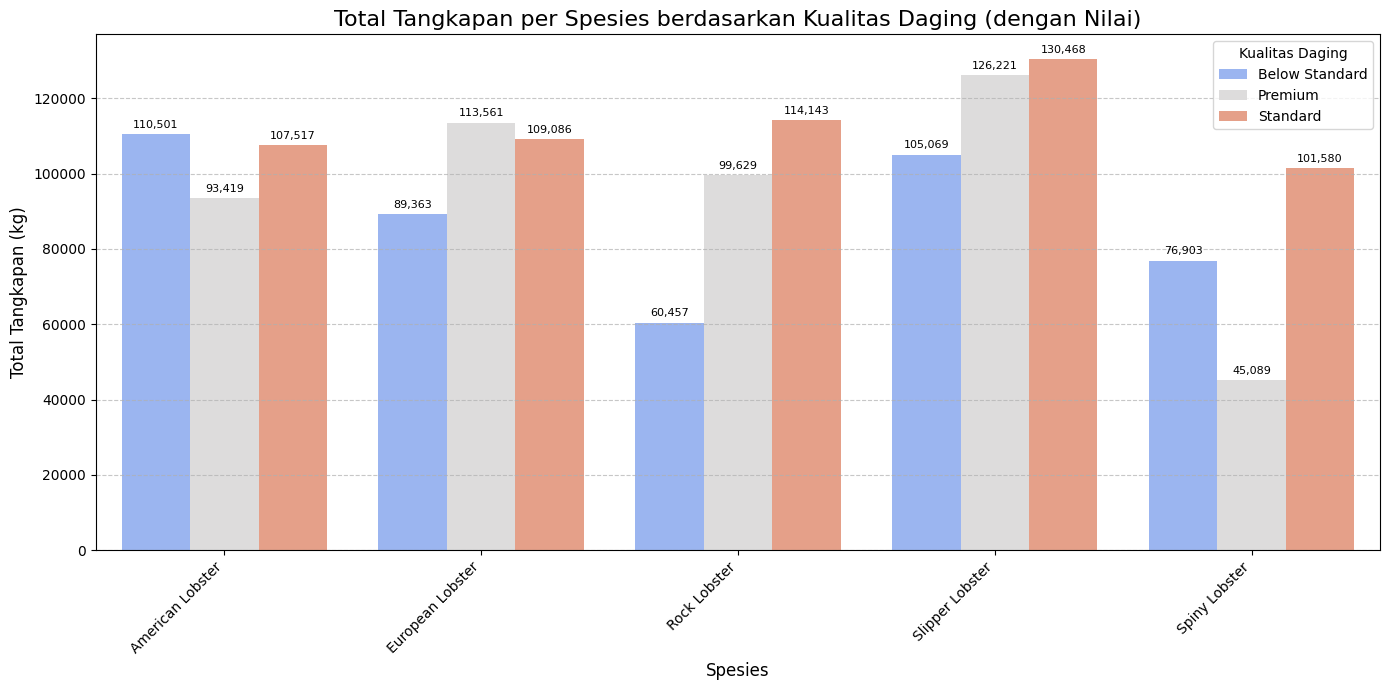

In [ ]:

# --- 2. Grouped Bar Chart ---
plt.figure(figsize=(12, 7))

# Reset index to make 'species' a column
pivot_table4_reset = pivot_table4.reset_index()

# Melt the DataFrame to long format
pivot_table4_melted = pivot_table4_reset.melt(id_vars='species',
                                              var_name='meat_quality',
                                              value_name='total_catch_this_year')


# --- Tambahan: Grouped Bar Chart dengan Label Angka ---
plt.figure(figsize=(14, 7)) # Perlebar agar label tidak terlalu berdempet

# Use the melted DataFrame for the second plot as well
ax = sns.barplot(data=pivot_table4_melted, x='species', y='total_catch_this_year', hue='meat_quality', palette='coolwarm')

plt.title('Total Tangkapan per Spesies berdasarkan Kualitas Daging (dengan Nilai)', fontsize=16)
plt.xlabel('Spesies', fontsize=12)
plt.ylabel('Total Tangkapan (kg)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kualitas Daging')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label di atas setiap bar
for container in ax.containers:
    # Menggunakan f-string untuk format angka dengan pemisah ribuan
    ax.bar_label(container, fmt='{:,.0f}', fontsize=8, color='black', padding=3)

plt.tight_layout()
plt.show()

Menyimpan hasil join dataset dari dataset 1-5

In [ ]:
joined_df4.to_csv('lobster_and_lobster_fishers_and_lobster_fishing_ground_and_lobster_market_sales_and_lobster_quality.csv', header=True)

# INNER JOIN DATASETS KE 1 DAN 6

In [ ]:
a=pd.read_csv('/content/lobster_vessels_dataset.csv')#menginput dataset ke 6
a

,vessel_id,vessel_name,vessel_type,length_feet,beam_feet,hull_material,engine_horsepower,fuel_capacity_gallons,crew_capacity,built_year,home_port,registration_number,insurance_value,gps_equipped,sonar_equipped
0,VSL001,"Campbell, Young and Chang Explorer",Offshore Vessel,56,25,Fiberglass,1259,1687,12,2013,Lake Victoria,REG5146,1445654,False,True
1,VSL002,Hamilton-Osborne Hunter,Offshore Vessel,112,19,Aluminum,1450,833,7,2018,West Johnmouth,REG2268,238090,True,False
2,VSL003,"Ramirez, Owens and Short Hunter",Lobster Boat,119,9,Wood,1183,277,9,2002,Simonview,REG4131,994619,False,False
3,VSL004,English Ltd Seeker,Lobster Boat,77,10,Fiberglass,743,1561,5,2013,New Rebekahmouth,REG5759,911615,True,False
4,VSL005,"Whitaker, Montoya and Schwartz Hunter",Lobster Boat,88,22,Fiberglass,556,1266,10,2000,Port Gracemouth,REG3407,406909,False,False
5,VSL006,Pacheco Ltd Catcher,Day Boat,61,14,Aluminum,826,755,9,2010,Jamesburgh,REG7759,1098526,False,False
6,VSL007,Love-Bates Explorer,Day Boat,54,9,Aluminum,1428,1100,5,2012,East Michelleport,REG2982,1997014,False,False
7,VSL008,"Anderson, Carter and Webb Seeker",Offshore Vessel,35,10,Fiberglass,878,1817,6,2017,East Jessica,REG5388,1032273,True,True
8,VSL009,Ibarra Group Explorer,Day Boat,71,13,Wood,976,1300,6,1997,North Haleymouth,REG6518,345534,True,True
9,VSL010,Horton and Sons Explorer,Day Boat,63,15,Fiberglass,1054,407,4,1994,Triciamouth,REG6850,1805959,False,False


**menggabungkan dataset 1-6**

In [ ]:
joined_df5=pd.merge(joined_df4,df_lobster_vessels,on='vessel_id',how='inner')
joined_df5

,Unnamed: 0,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,...,hull_material,engine_horsepower,fuel_capacity_gallons,crew_capacity,built_year,home_port,registration_number,insurance_value,gps_equipped,sonar_equipped
0,0,LOB00001,American Lobster,2023-10-05,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,...,Aluminum,1450,833,7,2018,West Johnmouth,REG2268,238090,True,False
1,13,LOB00014,European Lobster,2024-09-26,31.18,1140.4,16.82,Reject,Soft Shell,Hand Picking,...,Aluminum,783,153,6,1982,Timothyport,REG1609,106319,False,True
2,17,LOB00018,Slipper Lobster,2023-10-24,34.86,832.7,9.90,Grade B,Hard Shell,Trap,...,Aluminum,496,1785,12,2006,Zacharyland,REG8299,1762130,False,False
3,39,LOB00040,Rock Lobster,2025-03-29,19.07,800.2,8.50,Reject,Peeler,Diving,...,Aluminum,496,1785,12,2006,Zacharyland,REG8299,1762130,False,False
4,43,LOB00044,Slipper Lobster,2024-12-14,39.17,1235.1,13.66,Grade A,Peeler,Hand Picking,...,Fiberglass,1388,468,9,2020,Port Christina,REG3807,458010,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,9924,LOB09925,Rock Lobster,2024-11-08,38.36,205.2,11.20,Grade C,Hard Shell,Trawling,...,Fiberglass,934,1224,6,1989,Danielburgh,REG6113,168427,False,True
622,9935,LOB09936,Slipper Lobster,2023-08-11,42.10,524.1,11.82,Reject,Paper Shell,Trap,...,Aluminum,1445,1302,5,1993,Lake Anthony,REG5647,186022,True,True
623,9953,LOB09954,Spiny Lobster,2024-04-15,26.27,215.8,16.55,Grade A,Hard Shell,Trap,...,Aluminum,1494,149,7,1986,North John,REG2734,250381,True,True
624,9976,LOB09977,American Lobster,2024-08-21,28.58,1020.0,10.04,Grade A,Paper Shell,Hand Picking,...,Steel,414,947,5,1980,New Aliciaton,REG1584,807821,False,False


In [ ]:
joined_df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                626 non-null    int64         
 1   lobster_id                626 non-null    object        
 2   species                   626 non-null    object        
 3   catch_date                626 non-null    object        
 4   length_cm                 626 non-null    float64       
 5   weight_grams              626 non-null    float64       
 6   carapace_length_cm        626 non-null    float64       
 7   grade                     626 non-null    object        
 8   shell_condition           626 non-null    object        
 9   catch_method              626 non-null    object        
 10  fisher_id                 626 non-null    object        
 11  vessel_id                 626 non-null    object        
 12  fishing_ground_id     

In [ ]:
b=joined_df5.iloc[:,70:]
b.head(5)

,notes,vessel_name,vessel_type,length_feet,beam_feet,hull_material,engine_horsepower,fuel_capacity_gallons,crew_capacity,built_year,home_port,registration_number,insurance_value,gps_equipped,sonar_equipped
0,Evening family eight say whom instead. After s...,Hamilton-Osborne Hunter,Offshore Vessel,112,19,Aluminum,1450,833,7,2018,West Johnmouth,REG2268,238090,True,False
1,Size community decide position. In add pull be...,"Edwards, Elliott and Anderson Hunter",Lobster Boat,61,12,Aluminum,783,153,6,1982,Timothyport,REG1609,106319,False,True
2,News system dark bring student. Small write op...,"Green, Pratt and Shepard Seeker",Lobster Boat,93,22,Aluminum,496,1785,12,2006,Zacharyland,REG8299,1762130,False,False
3,Wait what cost beyond rock painting view. Cent...,"Green, Pratt and Shepard Seeker",Lobster Boat,93,22,Aluminum,496,1785,12,2006,Zacharyland,REG8299,1762130,False,False
4,Participant especially special sing while it. ...,Huber PLC Catcher,Lobster Boat,44,22,Fiberglass,1388,468,9,2020,Port Christina,REG3807,458010,True,True


In [ ]:
joined_df5.iloc[:,:70]

,Unnamed: 0,lobster_id,species,catch_date,length_cm,weight_grams,carapace_length_cm,grade,shell_condition,catch_method,...,inspector_name,visual_inspection,size_compliance,shell_integrity,meat_quality,parasite_check,contamination_test,overall_result,inspection_cost,certificate_issued
0,0,LOB00001,American Lobster,2023-10-05,15.75,557.5,10.23,Grade A,Hard Shell,Hand Picking,...,Sarah Wilson,Fail,True,Fair,Standard,Minor,Positive,Pass,13.02,True
1,13,LOB00014,European Lobster,2024-09-26,31.18,1140.4,16.82,Reject,Soft Shell,Hand Picking,...,Maria Garcia,Conditional Pass,False,Good,Below Standard,Minor,Positive,Conditional Pass,22.39,False
2,17,LOB00018,Slipper Lobster,2023-10-24,34.86,832.7,9.90,Grade B,Hard Shell,Trap,...,Sarah Wilson,Conditional Pass,True,Poor,Premium,Significant,Positive,Fail,13.86,False
3,39,LOB00040,Rock Lobster,2025-03-29,19.07,800.2,8.50,Reject,Peeler,Diving,...,John Smith,Conditional Pass,True,Poor,Premium,Minor,Negative,Retest Required,11.91,True
4,43,LOB00044,Slipper Lobster,2024-12-14,39.17,1235.1,13.66,Grade A,Peeler,Hand Picking,...,Sarah Wilson,Conditional Pass,False,Poor,Standard,Clear,Negative,Conditional Pass,15.31,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,9924,LOB09925,Rock Lobster,2024-11-08,38.36,205.2,11.20,Grade C,Hard Shell,Trawling,...,Sarah Wilson,Pass,False,Poor,Standard,Clear,Positive,Conditional Pass,7.36,False
622,9935,LOB09936,Slipper Lobster,2023-08-11,42.10,524.1,11.82,Reject,Paper Shell,Trap,...,John Smith,Fail,False,Fair,Standard,Clear,Negative,Fail,12.22,True
623,9953,LOB09954,Spiny Lobster,2024-04-15,26.27,215.8,16.55,Grade A,Hard Shell,Trap,...,David Johnson,Conditional Pass,True,Good,Below Standard,Clear,Positive,Pass,23.66,False
624,9976,LOB09977,American Lobster,2024-08-21,28.58,1020.0,10.04,Grade A,Paper Shell,Hand Picking,...,John Smith,Retest Required,True,Poor,Premium,Clear,Negative,Retest Required,6.37,False


In [ ]:
joined_df5['vessel_type'].value_counts()

,count
vessel_type,
Day Boat,180
Offshore Vessel,164
Lobster Boat,149
Trawler,133


**9. menghitung Rincian Total Tangkapan per Spesies menurut Jenis Kapal (Bertumpuk)**

In [ ]:
aa=joined_df5.pivot_table(values='total_catch_this_year',index='species',columns='vessel_type',aggfunc='sum')
aa

vessel_type,Day Boat,Lobster Boat,Offshore Vessel,Trawler
species,,,,
American Lobster,97567,84934,78221,50715
European Lobster,78668,77282,88954,67106
Rock Lobster,74612,64792,71562,63263
Slipper Lobster,117996,77056,81603,85103
Spiny Lobster,52594,43262,61819,65897


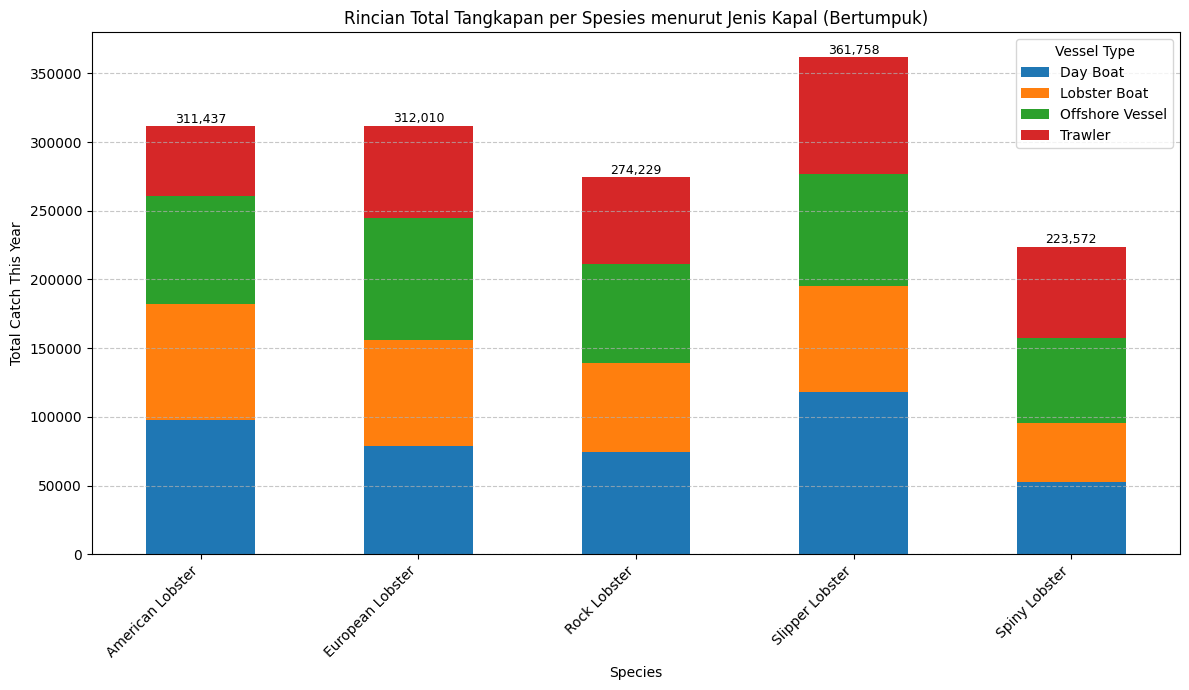

In [ ]:
# Asumsi 'aa' adalah DataFrame pivot table Anda

fig, ax = plt.subplots(figsize=(12, 7))

# Plot stacked bar chart
aa.plot(kind='bar', stacked=True, ax=ax)

plt.title('Rincian Total Tangkapan per Spesies menurut Jenis Kapal (Bertumpuk)')
plt.xlabel('Species')
plt.ylabel('Total Catch This Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vessel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- Tambahkan keterangan di atas setiap tumpukan bar (total) ---
# Dapatkan total untuk setiap spesies (sumbu Y dari setiap tumpukan)
totals = aa.sum(axis=1)

# Iterasi melalui setiap batang (setiap spesies)
for i, total in enumerate(totals):
    # Posisi X adalah tengah dari batang spesies (x_tick)
    # Posisi Y adalah total di atas batang
    ax.text(i, # Posisi X (indeks batang)
            total + 500, # Posisi Y (total + offset)
            f'{total:,.0f}', # Format nilai
            ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

# Interpretasi dan rekomendasi ada di dalam laporan secara detil.